In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

train_behavior_all=pd.read_csv('zhaohang/train_beh_final.csv')
train_tag=pd.read_csv('zhaohang/train/train_tag.csv')
train_trade_all=pd.read_csv('zhaohang/train_trd_final.csv')
test_behavior_all=pd.read_csv('zhaohang/test_beh_final.csv')
test_tag=pd.read_csv('zhaohang/test/test_tag.csv')
test_trade_all=pd.read_csv('zhaohang/test_trd_final.csv')

In [2]:
from numpy import nan as NaN
train_tag=train_tag.replace(r'\N', NaN)
test_tag=test_tag.replace(r'\N', NaN)
# train_tag.info()
# train_tag.isnull().sum()
# test_tag.isnull().sum()
# #弃掉三个特征 缺失太多

In [3]:
delete1=['edu_deg_cd','deg_cd','atdd_type']
train_tag=train_tag.drop(delete1,axis=1)
test_tag=test_tag.drop(delete1,axis=1)
#train_tag.info()

In [4]:
ID=test_tag['id']

In [5]:
# for j in list_test_trd_id:
#     cur_test_trd=test_trade.loc[test_trade.id==j]
#     income=-int(cur_test_trd.loc[cur_test_trd.Dat_Flg1_Cd=='C'].cny_trx_amt.sum())
#     out_A=-int(cur_test_trd.loc[(cur_test_trd.Dat_Flg1_Cd=='B')&(cur_test_trd.Dat_Flg3_Cd=='A')].cny_trx_amt.sum())
#     out_B=-int(cur_test_trd.loc[(cur_test_trd.Dat_Flg1_Cd=='B')&(cur_test_trd.Dat_Flg3_Cd=='B')].cny_trx_amt.sum())
#     out_C=-int(cur_test_trd.loc[(cur_test_trd.Dat_Flg1_Cd=='B')&(cur_test_trd.Dat_Flg3_Cd=='C')].cny_trx_amt.sum())
#     le=cur_test_trd.Trx_Cod2_Cd.mode()[0]
    
#     test_tag.loc[test_tag.id==j,'inc']=income
#     test_tag.loc[test_tag.id==j,'outA']=out_A
#     test_tag.loc[test_tag.id==j,'outB']=out_B
#     test_tag.loc[test_tag.id==j,'outC']=out_C
#     test_tag.loc[test_tag.id==j,'lev']=le

In [6]:
train_tag=train_tag.merge(train_trade_all,left_on='id',right_on='id',how='outer')
test_tag=test_tag.merge(test_trade_all,left_on='id',right_on='id',how='outer')

In [7]:
train_tag=train_tag.merge(train_behavior_all,left_on='id',right_on='id',how='outer')
test_tag=test_tag.merge(test_behavior_all,left_on='id',right_on='id',how='outer')

In [8]:
train_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39923 entries, 0 to 39922
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               39923 non-null  object 
 1   flag                             39923 non-null  int64  
 2   gdr_cd                           39187 non-null  object 
 3   age                              39923 non-null  int64  
 4   mrg_situ_cd                      39187 non-null  object 
 5   acdm_deg_cd                      39186 non-null  object 
 6   job_year                         39430 non-null  object 
 7   ic_ind                           39430 non-null  object 
 8   fr_or_sh_ind                     39430 non-null  object 
 9   dnl_mbl_bnk_ind                  39430 non-null  object 
 10  dnl_bind_cmb_lif_ind             39430 non-null  object 
 11  hav_car_grp_ind                  39423 non-null  object 
 12  hav_hou_grp_ind   

In [9]:
test_tag.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               4000 non-null   object 
 1   gdr_cd                           3914 non-null   object 
 2   age                              4000 non-null   int64  
 3   mrg_situ_cd                      3914 non-null   object 
 4   acdm_deg_cd                      3914 non-null   object 
 5   job_year                         3948 non-null   object 
 6   ic_ind                           3948 non-null   object 
 7   fr_or_sh_ind                     3948 non-null   object 
 8   dnl_mbl_bnk_ind                  3948 non-null   object 
 9   dnl_bind_cmb_lif_ind             3948 non-null   object 
 10  hav_car_grp_ind                  3948 non-null   object 
 11  hav_hou_grp_ind                  3948 non-null   object 
 12  l6mon_agn_ind       

In [10]:
#合并训练集和测试集
test_tag['flag'] = 0
combine = train_tag.append(test_tag) 
# combine.info()

In [11]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43923 entries, 0 to 3999
Data columns (total 66 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               43923 non-null  object 
 1   flag                             43923 non-null  int64  
 2   gdr_cd                           43101 non-null  object 
 3   age                              43923 non-null  int64  
 4   mrg_situ_cd                      43101 non-null  object 
 5   acdm_deg_cd                      43100 non-null  object 
 6   job_year                         43378 non-null  object 
 7   ic_ind                           43378 non-null  object 
 8   fr_or_sh_ind                     43378 non-null  object 
 9   dnl_mbl_bnk_ind                  43378 non-null  object 
 10  dnl_bind_cmb_lif_ind             43378 non-null  object 
 11  hav_car_grp_ind                  43371 non-null  object 
 12  hav_hou_grp_ind    

In [12]:
#app
print(combine.app.isnull().sum())
print("_______")
combine.app.describe()

30778
_______


count     13145
unique       19
top         CQA
freq      10412
Name: app, dtype: object

In [13]:
app_dic={'CQA':1,'CQE':2,'XAI':3,'TRN':4,'AAO':5 , 'BWA':6 ,'CQC':7,'CQD':8,'XAG':9 ,'MSG':10 ,
'SZD':11,'FTR':12 , 'EGA':13,'CTR':14 ,'GBA':15,  'CQB':16 ,'BWE':17, 'JF2':18,'JJK':19, 'MTA':20 }
combine['app'] = combine['app'].map(app_dic)

In [14]:
combine.app=combine.app.fillna(0)

In [15]:
combine.app=combine.app.astype('int64')

In [16]:
#app_frq
print(combine.app_frq.isnull().sum())
print("_______")
combine.app_frq.describe()

30778
_______


count    13145.000000
mean         6.677719
std          4.718847
min          1.000000
25%          3.909091
50%          5.727273
75%          8.285714
max         94.000000
Name: app_frq, dtype: float64

In [17]:
combine.app_frq=combine.app_frq.fillna(0)
combine.app_frq=combine.app_frq.round()

In [18]:
combine.app_frq=combine.app_frq.astype('int64')

In [19]:
combine.loc[combine['app_frq'] >= 30,'app_frq'] = 30

In [20]:
#CQA_ratio
print(combine.CQA_ratio.isnull().sum())
print("_______")
combine.CQA_ratio.describe()

30778
_______


count    13145.000000
mean         0.428406
std          0.192655
min          0.000000
25%          0.304348
50%          0.391753
75%          0.500000
max          1.000000
Name: CQA_ratio, dtype: float64

In [21]:
combine.CQA_ratio=combine.CQA_ratio.fillna(-1)

In [22]:
combine.loc[combine['CQA_ratio'] >= 1,'CQA_ratio'] = 11
combine.loc[(combine['CQA_ratio'] > 0) & (combine['CQA_ratio'] <0.1),'CQA_ratio'] = 1
combine.loc[(combine['CQA_ratio'] >= 0.1) & (combine['CQA_ratio'] <0.2),'CQA_ratio'] = 2
combine.loc[(combine['CQA_ratio'] >= 0.2) & (combine['CQA_ratio'] <0.3),'CQA_ratio'] = 3
combine.loc[(combine['CQA_ratio'] >= 0.3) & (combine['CQA_ratio'] <0.4),'CQA_ratio'] = 4
combine.loc[(combine['CQA_ratio'] >=0.4) & (combine['CQA_ratio'] <0.5),'CQA_ratio'] = 5
combine.loc[(combine['CQA_ratio'] >= 0.5) & (combine['CQA_ratio'] < 0.6),'CQA_ratio'] = 6
combine.loc[(combine['CQA_ratio'] >= 0.6) & (combine['CQA_ratio'] < 0.7),'CQA_ratio'] = 7
combine.loc[(combine['CQA_ratio'] >= 0.7) & (combine['CQA_ratio'] < 0.8),'CQA_ratio'] = 8
combine.loc[(combine['CQA_ratio'] >= 0.8) & (combine['CQA_ratio'] < 0.9),'CQA_ratio'] = 9
combine.loc[(combine['CQA_ratio'] >= 0.9) & (combine['CQA_ratio'] < 1),'CQA_ratio'] = 10
combine.CQA_ratio=combine.CQA_ratio.astype('int64')
combine['CQA_ratio'].describe()

count    43923.000000
mean         0.757075
std          2.910861
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          3.000000
max         11.000000
Name: CQA_ratio, dtype: float64

In [23]:
#CQE_ratio
print(combine.CQE_ratio.isnull().sum())
print("_______")
combine.CQE_ratio.describe()

30778
_______


count    13145.000000
mean         0.179145
std          0.152068
min          0.000000
25%          0.024390
50%          0.171429
75%          0.291925
max          1.000000
Name: CQE_ratio, dtype: float64

In [24]:
combine.CQE_ratio=combine.CQE_ratio.fillna(-1)

In [25]:
combine.loc[combine['CQE_ratio'] >= 1,'CQE_ratio'] = 7
combine.loc[(combine['CQE_ratio'] > 0) & (combine['CQE_ratio'] <0.1),'CQE_ratio'] = 1
combine.loc[(combine['CQE_ratio'] >= 0.1) & (combine['CQE_ratio'] <0.2),'CQE_ratio'] = 2
combine.loc[(combine['CQE_ratio'] >= 0.2) & (combine['CQE_ratio'] <0.3),'CQE_ratio'] = 3
combine.loc[(combine['CQE_ratio'] >= 0.3) & (combine['CQE_ratio'] <0.5),'CQE_ratio'] = 4
combine.loc[(combine['CQE_ratio'] >= 0.5) & (combine['CQE_ratio'] < 0.75),'CQE_ratio'] = 5
combine.loc[(combine['CQE_ratio'] >= 0.75) & (combine['CQE_ratio'] < 1),'CQE_ratio'] = 6
combine.CQE_ratio=combine.CQE_ratio.astype('int64')
combine['CQE_ratio'].describe()

count    43923.000000
mean        -0.059969
std          1.666287
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          7.000000
Name: CQE_ratio, dtype: float64

In [26]:
#inc
print(combine.inc.isnull().sum())
print("_______")
combine.inc.describe()

8740
_______


count    3.518300e+04
mean     7.633335e+04
std      7.398319e+05
min      0.000000e+00
25%      8.640000e+02
50%      6.478000e+03
75%      2.645650e+04
max      7.835568e+07
Name: inc, dtype: float64

In [27]:
combine.inc=combine.inc.fillna(0)

In [28]:
combine['inc']=combine['inc'].astype('int64')

In [29]:
combine.loc[(combine['inc'] >= 1) & (combine['inc'] <10),'inc'] = 1
combine.loc[(combine['inc'] >= 10) & (combine['inc'] <100),'inc'] = 2
combine.loc[(combine['inc'] >= 100) & (combine['inc'] <1000),'inc'] = 3
combine.loc[(combine['inc'] >= 1000) & (combine['inc'] <10000),'inc'] = 4
combine.loc[(combine['inc'] >=10000) & (combine['inc'] <100000),'inc'] = 5
combine.loc[(combine['inc'] >= 100000) & (combine['inc'] < 1000000),'inc'] = 6
combine.loc[(combine['inc'] >= 1000000) & (combine['inc'] < 10000000),'inc'] = 7
combine.loc[combine['inc'] >= 10000000,'inc'] = 8
combine['inc'].describe()

count    43923.000000
mean         3.120962
std          2.161169
min          0.000000
25%          0.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: inc, dtype: float64

In [30]:
#outA
print(combine.outA.isnull().sum())
print("_______")
combine.outA.describe()

8740
_______


count    3.518300e+04
mean     6.440817e+04
std      7.307862e+05
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      7.082500e+03
max      7.836404e+07
Name: outA, dtype: float64

In [31]:
combine.outA=combine.outA.fillna(0)
combine['outA']=combine['outA'].astype('int64')

In [32]:
combine.loc[(combine['outA'] >= 1) & (combine['outA'] <10),'outA'] = 1
combine.loc[(combine['outA'] >= 10) & (combine['outA'] <100),'outA'] = 2
combine.loc[(combine['outA'] >= 100) & (combine['outA'] <1000),'outA'] = 3
combine.loc[(combine['outA'] >= 1000) & (combine['outA'] <10000),'outA'] = 4
combine.loc[(combine['outA'] >=10000) & (combine['outA'] <100000),'outA'] = 5
combine.loc[(combine['outA'] >= 100000) & (combine['outA'] < 1000000),'outA'] = 6
combine.loc[(combine['outA'] >= 1000000) & (combine['outA'] < 10000000),'outA'] = 7
combine.loc[combine['outA'] >= 10000000,'outA'] = 8
combine['outA'].describe()

count    43923.000000
mean         1.392892
std          2.217063
min          0.000000
25%          0.000000
50%          0.000000
75%          4.000000
max          8.000000
Name: outA, dtype: float64

In [33]:
#outB
print(combine.outB.isnull().sum())
print("_______")
combine.outB.describe()

8740
_______


count    3.518300e+04
mean     1.060123e+04
std      2.376423e+04
min      0.000000e+00
25%      5.350000e+01
50%      2.523000e+03
75%      1.022450e+04
max      1.400683e+06
Name: outB, dtype: float64

In [34]:
combine.outB=combine.outB.fillna(0)
combine['outB']=combine['outB'].astype('int64')

In [35]:
combine.loc[(combine['outB'] >= 1) & (combine['outB'] <10),'outB'] = 1
combine.loc[(combine['outB'] >= 10) & (combine['outB'] <100),'outB'] = 2
combine.loc[(combine['outB'] >= 100) & (combine['outB'] <1000),'outB'] = 3
combine.loc[(combine['outB'] >= 1000) & (combine['outB'] <10000),'outB'] = 4
combine.loc[(combine['outB'] >=10000) & (combine['outB'] <100000),'outB'] = 5
combine.loc[(combine['outB'] >= 100000) & (combine['outB'] < 1000000),'outB'] = 6
combine.loc[combine['outB'] >= 1000000,'outB'] = 7
combine['outB'].describe()

count    43923.000000
mean         2.550805
std          2.081714
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: outB, dtype: float64

In [36]:
#outC
print(combine.outC.isnull().sum())
print("_______")
combine.outC.describe()

8740
_______


count    3.518300e+04
mean     1.514480e+03
std      4.079478e+04
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      4.682629e+06
Name: outC, dtype: float64

In [37]:
combine.outC=combine.outC.fillna(0)
combine['outC']=combine['outC'].astype('int64')

In [38]:
combine.loc[(combine['outC'] >= 1) & (combine['outC'] <10),'outC'] = 1
combine.loc[(combine['outC'] >= 10) & (combine['outC'] <100),'outC'] = 2
combine.loc[(combine['outC'] >= 100) & (combine['outC'] <1000),'outC'] = 3
combine.loc[(combine['outC'] >= 1000) & (combine['outC'] <10000),'outC'] = 4
combine.loc[(combine['outC'] >=10000) & (combine['outC'] <100000),'outC'] = 5
combine.loc[(combine['outC'] >= 100000) & (combine['outC'] < 1000000),'outC'] = 6
combine.loc[combine['outC'] >= 1000000,'outC'] = 7
combine['outC'].describe()

count    43923.000000
mean         0.109419
std          0.694913
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: outC, dtype: float64

In [39]:
#lev
print(combine.lev.isnull().sum())
print("_______")
combine.lev.describe()

8740
_______


count    35183.000000
mean       182.746866
std         80.253448
min        101.000000
25%        131.000000
50%        136.000000
75%        308.000000
max        310.000000
Name: lev, dtype: float64

In [40]:
combine.lev=combine.lev.fillna(0)
combine['lev']=combine['lev'].astype('int64')

In [41]:
#inc_mean
print(combine.inc_mean.isnull().sum())
print("_______")
combine.inc_mean.describe()

10793
_______


count    3.313000e+04
mean     5.316941e+03
std      4.182456e+04
min      1.000000e-02
25%      4.500025e+02
50%      1.650000e+03
75%      4.266321e+03
max      4.609158e+06
Name: inc_mean, dtype: float64

In [42]:
combine.inc_mean=combine.inc_mean.fillna(0)
combine['inc_mean']=combine['inc_mean'].astype('int64')

In [43]:
combine.loc[(combine['inc_mean'] >= 1) & (combine['inc_mean'] <10),'inc_mean'] = 1
combine.loc[(combine['inc_mean'] >= 10) & (combine['inc_mean'] <100),'inc_mean'] = 2
combine.loc[(combine['inc_mean'] >= 100) & (combine['inc_mean'] <1000),'inc_mean'] = 3
combine.loc[(combine['inc_mean'] >= 1000) & (combine['inc_mean'] <10000),'inc_mean'] = 4
combine.loc[(combine['inc_mean'] >=10000) & (combine['inc_mean'] <100000),'inc_mean'] = 5
combine.loc[(combine['inc_mean'] >= 100000) & (combine['inc_mean'] < 1000000),'inc_mean'] = 6
combine.loc[combine['inc_mean'] >= 1000000,'inc_mean'] = 7
combine['inc_mean'].describe()

count    43923.000000
mean         2.619994
std          1.788778
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: inc_mean, dtype: float64

In [44]:
#BAmean
print(combine.BAmean.isnull().sum())
print("_______")
combine.BAmean.describe()

30103
_______


count    1.382000e+04
mean     8.669939e+03
std      1.133654e+05
min      1.000000e-02
25%      1.974423e+02
50%      9.074196e+02
75%      3.271872e+03
max      1.014500e+07
Name: BAmean, dtype: float64

In [45]:
combine.BAmean=combine.BAmean.fillna(0)
combine['BAmean']=combine['BAmean'].astype('int64')

In [46]:
combine.loc[(combine['BAmean'] >= 1) & (combine['BAmean'] <10),'BAmean'] = 1
combine.loc[(combine['BAmean'] >= 10) & (combine['BAmean'] <100),'BAmean'] = 2
combine.loc[(combine['BAmean'] >= 100) & (combine['BAmean'] <1000),'BAmean'] = 3
combine.loc[(combine['BAmean'] >= 1000) & (combine['BAmean'] <10000),'BAmean'] = 4
combine.loc[(combine['BAmean'] >=10000) & (combine['BAmean'] <100000),'BAmean'] = 5
combine.loc[(combine['BAmean'] >= 100000) & (combine['BAmean'] < 1000000),'BAmean'] = 6
combine.loc[(combine['BAmean'] >= 1000000) & (combine['BAmean'] < 10000000),'BAmean'] = 7
combine.loc[combine['BAmean'] >= 10000000,'BAmean'] = 8
combine['BAmean'].describe()

count    43923.000000
mean         1.040685
std          1.666317
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max          8.000000
Name: BAmean, dtype: float64

In [47]:
#BBmean
print(combine.BBmean.isnull().sum())
print("_______")
combine.BBmean.describe()

16218
_______


count    27705.000000
mean      1457.207772
std       3305.520035
min          0.010000
25%        117.394444
50%        387.125000
75%       1350.000000
max      65768.000000
Name: BBmean, dtype: float64

In [48]:
combine.BBmean=combine.BBmean.fillna(0)
combine['BBmean']=combine['BBmean'].astype('int64')

In [49]:
combine.loc[(combine['BBmean'] >= 1) & (combine['BBmean'] <10),'BBmean'] = 1
combine.loc[(combine['BBmean'] >= 10) & (combine['BBmean'] <100),'BBmean'] = 2
combine.loc[(combine['BBmean'] >= 100) & (combine['BBmean'] <1000),'BBmean'] = 3
combine.loc[(combine['BBmean'] >= 1000) & (combine['BBmean'] <10000),'BBmean'] = 4
combine.loc[combine['BBmean'] >= 10000,'BBmean'] = 5
combine['BBmean'].describe()

count    43923.000000
mean         1.941306
std          1.626255
min          0.000000
25%          0.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: BBmean, dtype: float64

In [50]:
#trd_frq
print(combine.trd_frq.isnull().sum())
print("_______")
combine.trd_frq.describe()

8740
_______


count    35183.000000
mean         2.003612
std          1.578074
min          1.000000
25%          1.200000
50%          1.666667
75%          2.285714
max        119.102041
Name: trd_frq, dtype: float64

In [51]:
combine.trd_frq=combine.trd_frq.fillna(0)
combine.trd_frq=combine.trd_frq.round()
combine.trd_frq=combine.trd_frq.astype('int64')

In [52]:
combine.loc[combine['trd_frq'] >= 20,'trd_frq'] = 20

In [53]:
#trd1_1
print(combine.trd1_1.isnull().sum())
print("_______")
combine.trd1_1.describe()


8740
_______


count    35183.000000
mean        29.980104
std         67.609674
min          0.000000
25%          2.000000
50%          8.000000
75%         30.000000
max       5692.000000
Name: trd1_1, dtype: float64

In [54]:
combine.trd1_1=combine.trd1_1.fillna(-1)
combine.trd1_1=combine.trd1_1.astype('int64')

In [55]:
combine.trd1_1.describe()

count    43923.000000
mean        23.815541
std         61.761280
min         -1.000000
25%          0.000000
50%          4.000000
75%         21.000000
max       5692.000000
Name: trd1_1, dtype: float64

In [56]:
combine.loc[(combine['trd1_1'] >= 30) & (combine['trd1_1'] <100),'trd1_1'] = 30
combine.loc[(combine['trd1_1'] >= 100) & (combine['trd1_1'] <1000),'trd1_1'] = 31
combine.loc[combine['trd1_1'] >= 1000,'trd1_1'] = 32
combine['trd1_1'].describe()


count    43923.000000
mean        10.191676
std         12.048402
min         -1.000000
25%          0.000000
50%          4.000000
75%         21.000000
max         32.000000
Name: trd1_1, dtype: float64

In [57]:
#trd1_2
print(combine.trd1_2.isnull().sum())
print("_______")
combine.trd1_2.describe()


8740
_______


count    35183.000000
mean         5.335816
std         22.617518
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max       1573.000000
Name: trd1_2, dtype: float64

In [58]:
combine.trd1_2=combine.trd1_2.fillna(-1)
combine.trd1_2=combine.trd1_2.astype('int64')

In [59]:
combine.trd1_2.value_counts()

 0      14798
-1       8740
 1       5837
 2       2464
 3       2040
        ...  
 123        1
 144        1
 304        1
 113        1
 223        1
Name: trd1_2, Length: 211, dtype: int64

In [60]:
combine.loc[(combine['trd1_2'] >= 10) & (combine['trd1_2'] <100),'trd1_2'] = 10
combine.loc[(combine['trd1_2'] >= 100) & (combine['trd1_2'] <1000),'trd1_2'] = 11
combine.loc[combine['trd1_2'] >= 1000,'trd1_2'] = 12
combine['trd1_2'].describe()

count    43923.000000
mean         1.983289
std          3.532547
min         -1.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         12.000000
Name: trd1_2, dtype: float64

In [61]:
#trd1_3
print(combine.trd1_3.isnull().sum())
print("_______")
combine.trd1_3.describe()

8740
_______


count    35183.000000
mean         7.495779
std         14.308334
min          0.000000
25%          2.000000
50%          4.000000
75%          8.000000
max        632.000000
Name: trd1_3, dtype: float64

In [62]:
combine.trd1_3=combine.trd1_3.fillna(-1)
combine.trd1_3=combine.trd1_3.astype('int64')

In [63]:
combine.loc[(combine['trd1_3'] >= 10) & (combine['trd1_3'] <100),'trd1_3'] = 10
combine.loc[combine['trd1_3'] >= 100,'trd1_3'] = 12
combine['trd1_3'].describe()

count    43923.000000
mean         3.438836
std          3.885691
min         -1.000000
25%          0.000000
50%          2.000000
75%          6.000000
max         12.000000
Name: trd1_3, dtype: float64

In [64]:
#trd2_136
print(combine.trd2_136.isnull().sum())
print("_______")
combine.trd2_136.describe()

8740
_______


count    35183.000000
mean         6.880482
std         19.452952
min          0.000000
25%          0.000000
50%          1.000000
75%          6.000000
max       1808.000000
Name: trd2_136, dtype: float64

In [65]:

combine.trd2_136=combine.trd2_136.fillna(-1)
combine.trd2_136=combine.trd2_136.astype('int64')

In [66]:
combine.trd2_136.value_counts()

 0      14859
-1       8740
 1       4243
 2       2556
 3       1676
        ...  
 341        1
 214        1
 293        1
 165        1
 191        1
Name: trd2_136, Length: 171, dtype: int64

In [67]:
combine.loc[(combine['trd2_136'] >= 10) & (combine['trd2_136'] <100),'trd2_136'] = 10
combine.loc[(combine['trd2_136'] >= 100) & (combine['trd2_136'] <1000),'trd2_136'] = 11
combine.loc[combine['trd2_136'] >= 1000,'trd2_136'] = 12
combine['trd2_136'].describe()

count    43923.000000
mean         2.372789
std          3.912393
min         -1.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         12.000000
Name: trd2_136, dtype: float64

In [68]:
#trd2_132
print(combine.trd2_132.isnull().sum())
print("_______")
combine.trd2_132.describe()

8740
_______


count    35183.000000
mean         5.659296
std         29.184632
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max       1903.000000
Name: trd2_132, dtype: float64

In [69]:
combine.trd2_132=combine.trd2_132.fillna(-1)
combine.trd2_132=combine.trd2_132.astype('int64')

In [70]:
combine.loc[(combine['trd2_132'] >= 10) & (combine['trd2_132'] <100),'trd2_132'] = 10
combine.loc[(combine['trd2_132'] >= 100) & (combine['trd2_132'] <1000),'trd2_132'] = 11
combine.loc[combine['trd2_132'] >= 1000,'trd2_132'] = 12
combine['trd2_132'].describe()

count    43923.000000
mean         1.128816
std          3.235266
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         12.000000
Name: trd2_132, dtype: float64

In [71]:
#total_pay
print(combine.total_pay.isnull().sum())
print("_______")
combine.total_pay.describe()

8740
_______


count    3.518300e+04
mean     7.652388e+04
std      7.354724e+05
min      0.000000e+00
25%      1.004500e+03
50%      6.772000e+03
75%      2.644650e+04
max      7.836404e+07
Name: total_pay, dtype: float64

In [72]:
combine.total_pay=combine.total_pay.fillna(-1)
combine.total_pay=combine.total_pay.round()
combine.total_pay=combine.total_pay.astype('int64')

In [73]:
combine.total_pay.describe()

count    4.392300e+04
mean     6.129661e+04
std      6.589506e+05
min     -1.000000e+00
25%      0.000000e+00
50%      3.264000e+03
75%      1.836600e+04
max      7.836404e+07
Name: total_pay, dtype: float64

In [74]:
combine.loc[(combine['total_pay'] >= 1) & (combine['total_pay'] <10),'total_pay'] = 1
combine.loc[(combine['total_pay'] >= 10) & (combine['total_pay'] <100),'total_pay'] = 2
combine.loc[(combine['total_pay'] >= 100) & (combine['total_pay'] <1000),'total_pay'] = 3
combine.loc[(combine['total_pay'] >= 1000) & (combine['total_pay'] <10000),'total_pay'] = 4
combine.loc[(combine['total_pay'] >=10000) & (combine['total_pay'] <100000),'total_pay'] = 5
combine.loc[(combine['total_pay'] >= 100000) & (combine['total_pay'] < 1000000),'total_pay'] = 6
combine.loc[(combine['total_pay'] >= 1000000) & (combine['total_pay'] < 10000000),'total_pay'] = 7
combine.loc[combine['total_pay'] >= 10000000,'total_pay'] = 8
combine['total_pay'].describe()

count    43923.000000
mean         2.966054
std          2.448004
min         -1.000000
25%          0.000000
50%          4.000000
75%          5.000000
max          8.000000
Name: total_pay, dtype: float64

In [75]:
#inorout_ind
print(combine.inorout_ind.isnull().sum())
print("_______")
combine.inorout_ind.describe()

8740
_______


count    35183.000000
mean        -0.020322
std          0.959389
min         -1.000000
25%         -1.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: inorout_ind, dtype: float64

In [76]:
combine.inorout_ind=combine.inorout_ind.fillna(2)
combine.inorout_ind=combine.inorout_ind.astype('int64')

In [77]:
#inorout_sum
print(combine.inorout_sum.isnull().sum())
print("_______")
combine.inorout_sum.describe()

8740
_______


count    3.518300e+04
mean    -1.905380e+02
std      1.170097e+05
min     -9.997653e+06
25%     -1.528500e+03
50%      0.000000e+00
75%      1.015000e+03
max      9.916500e+06
Name: inorout_sum, dtype: float64

In [78]:
combine.loc[(combine['inorout_sum'] > -100) & (combine['inorout_sum'] <=-1),'inorout_sum'] = -1
combine.loc[(combine['inorout_sum'] > -1000) & (combine['inorout_sum'] <=-100),'inorout_sum'] = -2
combine.loc[(combine['inorout_sum'] > -10000) & (combine['inorout_sum'] <=-1000),'inorout_sum'] = -3
combine.loc[(combine['inorout_sum'] > -100000) & (combine['inorout_sum'] <=-10000),'inorout_sum'] = -4
combine.loc[(combine['inorout_sum'] > -1000000) & (combine['inorout_sum'] <=-100000),'inorout_sum'] = -5
combine.loc[combine['inorout_sum'] <= -1000000,'inorout_sum'] = -6

combine.loc[(combine['inorout_sum'] >= 1) & (combine['inorout_sum'] <100),'inorout_sum'] = 1
combine.loc[(combine['inorout_sum'] >= 100) & (combine['inorout_sum'] <1000),'inorout_sum'] = 2
combine.loc[(combine['inorout_sum'] >= 1000) & (combine['inorout_sum'] <10000),'inorout_sum'] = 3
combine.loc[(combine['inorout_sum'] >=10000) & (combine['inorout_sum'] <100000),'inorout_sum'] = 4
combine.loc[(combine['inorout_sum'] >= 100000) & (combine['inorout_sum'] < 1000000),'inorout_sum'] = 5
combine.loc[combine['inorout_sum'] >= 1000000,'inorout_sum'] = 6
combine.inorout_sum=combine.inorout_sum.fillna(7)
combine.inorout_sum=combine.inorout_sum.astype('int64')
combine['inorout_sum'].describe()

count    43923.000000
mean         1.329850
std          3.716519
min         -6.000000
25%         -2.000000
50%          2.000000
75%          4.000000
max          7.000000
Name: inorout_sum, dtype: float64

In [79]:
#BA_ratio
print(combine.BA_ratio.isnull().sum())
print("_______")
combine.BA_ratio.describe()

8740
_______


count    35183.000000
mean         0.266743
std          0.393300
min          0.000000
25%          0.000000
50%          0.000000
75%          0.588057
max          1.000000
Name: BA_ratio, dtype: float64

In [80]:
combine.BA_ratio=combine.BA_ratio.fillna(-1)

combine.loc[combine['BA_ratio'] >= 1,'BA_ratio'] = 11
combine.loc[(combine['BA_ratio'] > 0) & (combine['BA_ratio'] <0.1),'BA_ratio'] = 1
combine.loc[(combine['BA_ratio'] >= 0.1) & (combine['BA_ratio'] <0.2),'BA_ratio'] = 2
combine.loc[(combine['BA_ratio'] >= 0.2) & (combine['BA_ratio'] <0.3),'BA_ratio'] = 3
combine.loc[(combine['BA_ratio'] >= 0.3) & (combine['BA_ratio'] <0.4),'BA_ratio'] = 4
combine.loc[(combine['BA_ratio'] >=0.4) & (combine['BA_ratio'] <0.5),'BA_ratio'] = 5
combine.loc[(combine['BA_ratio'] >= 0.5) & (combine['BA_ratio'] < 0.6),'BA_ratio'] = 6
combine.loc[(combine['BA_ratio'] >= 0.6) & (combine['BA_ratio'] < 0.7),'BA_ratio'] = 7
combine.loc[(combine['BA_ratio'] >= 0.7) & (combine['BA_ratio'] < 0.8),'BA_ratio'] = 8
combine.loc[(combine['BA_ratio'] >= 0.8) & (combine['BA_ratio'] < 0.9),'BA_ratio'] = 9
combine.loc[(combine['BA_ratio'] >= 0.9) & (combine['BA_ratio'] < 1),'BA_ratio'] = 10
combine.BA_ratio=combine.BA_ratio.astype('int64')
combine['BA_ratio'].describe()

count    43923.000000
mean         2.151948
std          4.120404
min         -1.000000
25%          0.000000
50%          0.000000
75%          4.000000
max         11.000000
Name: BA_ratio, dtype: float64

In [81]:
#BB_ratio
print(combine.BB_ratio.isnull().sum())
print("_______")
combine.BB_ratio.describe()

8740
_______


count    35183.000000
mean         0.640129
std          0.434279
min          0.000000
25%          0.080000
50%          1.000000
75%          1.000000
max          1.000000
Name: BB_ratio, dtype: float64

In [82]:
combine.BB_ratio=combine.BB_ratio.fillna(-1)

combine.loc[combine['BB_ratio'] >= 1,'BB_ratio'] = 5
combine.loc[(combine['BB_ratio'] > 0) & (combine['BB_ratio'] <0.1),'BB_ratio'] = 1
combine.loc[(combine['BB_ratio'] >= 0.1) & (combine['BB_ratio'] <0.4),'BB_ratio'] = 2
combine.loc[(combine['BB_ratio'] >=0.4) & (combine['BB_ratio'] <0.7),'BB_ratio'] = 3
combine.loc[(combine['BB_ratio'] >= 0.7) & (combine['BB_ratio'] < 1),'BB_ratio'] = 4
combine.BB_ratio=combine.BB_ratio.astype('int64')
combine['BB_ratio'].describe()

count    43923.000000
mean         2.439792
std          2.511970
min         -1.000000
25%          0.000000
50%          3.000000
75%          5.000000
max          5.000000
Name: BB_ratio, dtype: float64

In [83]:
#BC_ratio
print(combine.BC_ratio.isnull().sum())
print("_______")
combine.BC_ratio.describe()

8740
_______


count    35183.000000
mean         0.006836
std          0.062898
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: BC_ratio, dtype: float64

In [84]:
combine.BC_ratio=combine.BC_ratio.fillna(-1)

combine.loc[combine['BC_ratio'] >= 1,'BC_ratio'] = 5
combine.loc[(combine['BC_ratio'] > 0) & (combine['BC_ratio'] <0.25),'BC_ratio'] = 1
combine.loc[(combine['BC_ratio'] >= 0.25) & (combine['BC_ratio'] <0.5),'BC_ratio'] = 2
combine.loc[(combine['BC_ratio'] >=0.5) & (combine['BC_ratio'] <0.75),'BC_ratio'] = 3
combine.loc[(combine['BC_ratio'] >= 0.75) & (combine['BC_ratio'] < 1),'BC_ratio'] = 4
combine.BC_ratio=combine.BC_ratio.astype('int64')
combine['BC_ratio'].describe()

count    43923.000000
mean        -0.157822
std          0.523653
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.000000
Name: BC_ratio, dtype: float64

In [85]:
#TrxCod2_ratio
print(combine.TrxCod2_ratio.isnull().sum())
print("_______")
combine.TrxCod2_ratio.describe()

8740
_______


count    35183.000000
mean         0.450455
std          0.234156
min          0.083333
25%          0.285714
50%          0.388889
75%          0.500000
max          1.000000
Name: TrxCod2_ratio, dtype: float64

In [86]:
combine.TrxCod2_ratio=combine.TrxCod2_ratio.fillna(0)

combine.loc[combine['TrxCod2_ratio'] >= 1,'TrxCod2_ratio'] = 11
combine.loc[(combine['TrxCod2_ratio'] > 0) & (combine['TrxCod2_ratio'] <0.1),'TrxCod2_ratio'] = 1
combine.loc[(combine['TrxCod2_ratio'] >= 0.1) & (combine['TrxCod2_ratio'] <0.2),'TrxCod2_ratio'] = 2
combine.loc[(combine['TrxCod2_ratio'] >= 0.2) & (combine['TrxCod2_ratio'] <0.3),'TrxCod2_ratio'] = 3
combine.loc[(combine['TrxCod2_ratio'] >= 0.3) & (combine['TrxCod2_ratio'] <0.4),'TrxCod2_ratio'] = 4
combine.loc[(combine['TrxCod2_ratio'] >=0.4) & (combine['TrxCod2_ratio'] <0.5),'TrxCod2_ratio'] = 5
combine.loc[(combine['TrxCod2_ratio'] >= 0.5) & (combine['TrxCod2_ratio'] < 0.6),'TrxCod2_ratio'] = 6
combine.loc[(combine['TrxCod2_ratio'] >= 0.6) & (combine['TrxCod2_ratio'] < 0.7),'TrxCod2_ratio'] = 7
combine.loc[(combine['TrxCod2_ratio'] >= 0.7) & (combine['TrxCod2_ratio'] < 0.8),'TrxCod2_ratio'] = 8
combine.loc[(combine['TrxCod2_ratio'] >= 0.8) & (combine['TrxCod2_ratio'] < 0.9),'TrxCod2_ratio'] = 9
combine.loc[(combine['TrxCod2_ratio'] >= 0.9) & (combine['TrxCod2_ratio'] < 1),'TrxCod2_ratio'] = 10
combine.TrxCod2_ratio=combine.TrxCod2_ratio.astype('int64')
combine['TrxCod2_ratio'].describe()

count    43923.000000
mean         4.124991
std          3.026309
min          0.000000
25%          3.000000
50%          4.000000
75%          6.000000
max         11.000000
Name: TrxCod2_ratio, dtype: float64

0
_______


count    43923.000000
mean         1.439906
std          1.451806
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max        173.000000
Name: cur_credit_cnt, dtype: float64

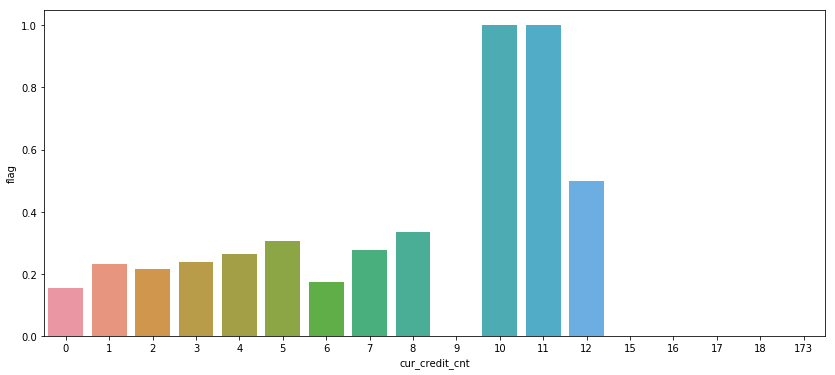

In [87]:
#cur_credit_cnt
plt.figure(figsize=(14,6))
cur_credit_cnt_flag=combine[:39923][['cur_credit_cnt', 'flag']].groupby(['cur_credit_cnt'],as_index=False).mean()
sns.barplot(x='cur_credit_cnt', y='flag',data=cur_credit_cnt_flag)
print(combine.cur_credit_cnt.isnull().sum())
print("_______")
combine.cur_credit_cnt.describe()

In [88]:
combine.loc[combine['cur_credit_cnt'] >=8,'cur_credit_cnt'] = 8

combine['cur_credit_cnt'].describe()

count    43923.000000
mean         1.430890
std          0.859818
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: cur_credit_cnt, dtype: float64

In [89]:
#cur_credit_min_opn_dt_cnt
print(combine.cur_credit_min_opn_dt_cnt.isnull().sum())
print("_______")
combine.cur_credit_min_opn_dt_cnt.describe()

0
_______


count    43923.000000
mean      1292.516905
std       1269.614518
min         -1.000000
25%        360.000000
50%        860.000000
75%       1810.000000
max       6086.000000
Name: cur_credit_min_opn_dt_cnt, dtype: float64

In [90]:
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 0) & (combine['cur_credit_min_opn_dt_cnt'] <=180),
            'cur_credit_min_opn_dt_cnt'] = 0
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 181) & (combine['cur_credit_min_opn_dt_cnt'] <=365),
            'cur_credit_min_opn_dt_cnt'] = 1
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 366) & (combine['cur_credit_min_opn_dt_cnt'] <=730),
            'cur_credit_min_opn_dt_cnt'] = 2
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 731) & (combine['cur_credit_min_opn_dt_cnt'] <= 1095),
            'cur_credit_min_opn_dt_cnt'] = 3
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 1096) & (combine['cur_credit_min_opn_dt_cnt'] <= 1460),
            'cur_credit_min_opn_dt_cnt'] = 4
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 1461) & (combine['cur_credit_min_opn_dt_cnt'] <= 1825),
            'cur_credit_min_opn_dt_cnt'] = 5
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 1826) & (combine['cur_credit_min_opn_dt_cnt'] <= 2190),
            'cur_credit_min_opn_dt_cnt'] = 6
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 2191) & (combine['cur_credit_min_opn_dt_cnt'] <= 2555),
            'cur_credit_min_opn_dt_cnt'] = 7
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 2556) & (combine['cur_credit_min_opn_dt_cnt'] <= 2920),
            'cur_credit_min_opn_dt_cnt'] = 8
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 2921) & (combine['cur_credit_min_opn_dt_cnt'] <= 3285),
            'cur_credit_min_opn_dt_cnt'] = 9
combine.loc[(combine['cur_credit_min_opn_dt_cnt'] >= 3286) & (combine['cur_credit_min_opn_dt_cnt'] <= 3650),
            'cur_credit_min_opn_dt_cnt'] = 10
combine.loc[combine['cur_credit_min_opn_dt_cnt'] >= 3651,'cur_credit_min_opn_dt_cnt'] = 11
combine['cur_credit_min_opn_dt_cnt'].describe()

count    43923.000000
mean         3.728935
std          3.336284
min         -1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max         11.000000
Name: cur_credit_min_opn_dt_cnt, dtype: float64

545
_______


count     43378
unique       12
top          20
freq      23755
Name: hld_crd_card_grd_cd, dtype: object

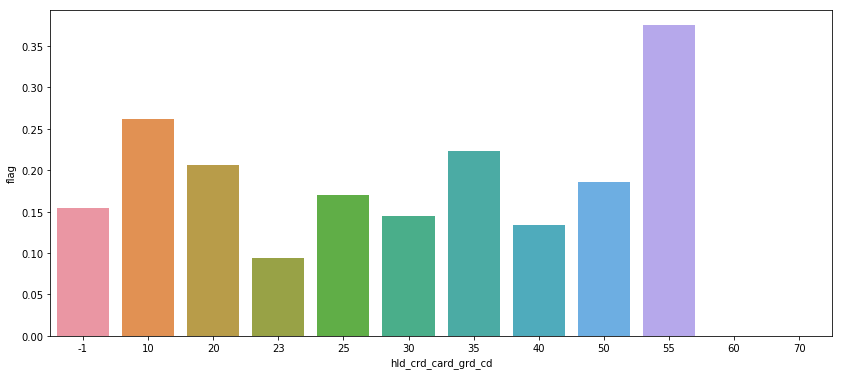

In [91]:
#hld_crd_card_grd_cd
plt.figure(figsize=(14,6))
hld_crd_card_grd_cd_flag=combine[:39923][['hld_crd_card_grd_cd', 'flag']].groupby(['hld_crd_card_grd_cd'],as_index=False).mean()
sns.barplot(x='hld_crd_card_grd_cd', y='flag',data=hld_crd_card_grd_cd_flag)
print(combine.hld_crd_card_grd_cd.isnull().sum())
print("_______")
combine.hld_crd_card_grd_cd.describe()

In [92]:
combine.hld_crd_card_grd_cd=combine.hld_crd_card_grd_cd.fillna(0)
combine['hld_crd_card_grd_cd']=combine['hld_crd_card_grd_cd'].astype('int64')

In [93]:
combine.loc[combine['hld_crd_card_grd_cd'] >=60,'hld_crd_card_grd_cd'] = 60
combine['hld_crd_card_grd_cd'].describe()

count    43923.000000
mean        15.190720
std          7.313473
min         -1.000000
25%         10.000000
50%         20.000000
75%         20.000000
max         60.000000
Name: hld_crd_card_grd_cd, dtype: float64

552
_______


count     43371
unique        2
top           1
freq      31421
Name: crd_card_act_ind, dtype: object

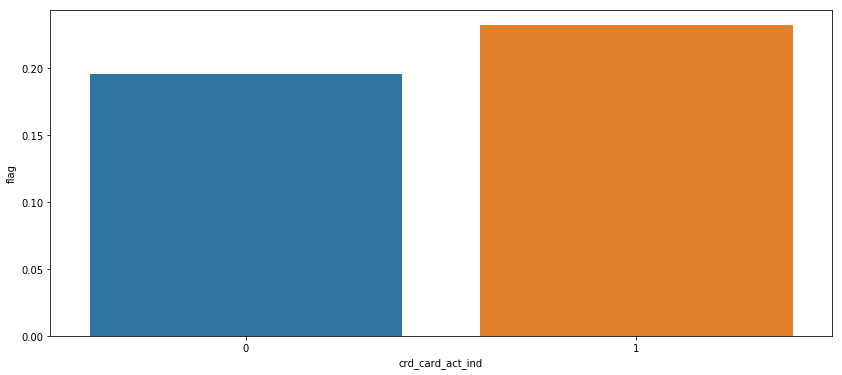

In [94]:
#crd_card_act_ind
plt.figure(figsize=(14,6))
crd_card_act_ind_flag=combine[:39923][['crd_card_act_ind', 'flag']].groupby(['crd_card_act_ind'],as_index=False).mean()
sns.barplot(x='crd_card_act_ind', y='flag',data=crd_card_act_ind_flag)
print(combine.crd_card_act_ind.isnull().sum())
print("_______")
combine.crd_card_act_ind.describe()

In [95]:
combine.crd_card_act_ind[combine.crd_card_act_ind.isnull()]=combine.crd_card_act_ind.dropna().mode().values
print(combine.crd_card_act_ind.isnull().sum())

0


552
_______


count     43371
unique        6
top           3
freq      12889
Name: l1y_crd_card_csm_amt_dlm_cd, dtype: object

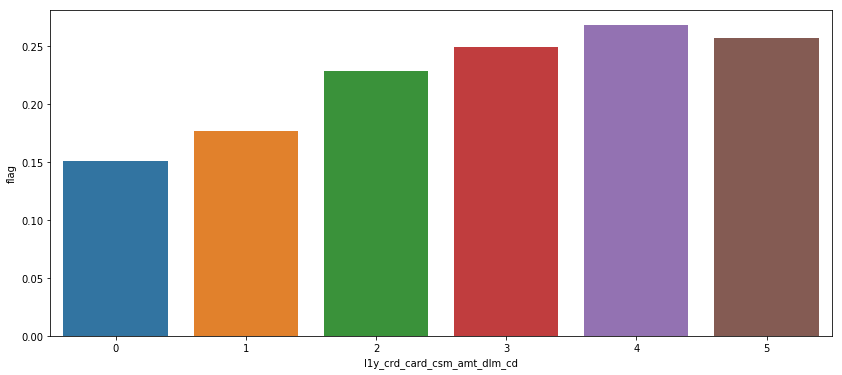

In [96]:
#l1y_crd_card_csm_amt_dlm_cd
plt.figure(figsize=(14,6))
l1y_crd_card_csm_amt_dlm_cd_flag=combine[:39923][['l1y_crd_card_csm_amt_dlm_cd', 'flag']].groupby(['l1y_crd_card_csm_amt_dlm_cd'],as_index=False).mean()
sns.barplot(x='l1y_crd_card_csm_amt_dlm_cd', y='flag',data=l1y_crd_card_csm_amt_dlm_cd_flag)
print(combine.l1y_crd_card_csm_amt_dlm_cd.isnull().sum())
print("_______")
combine.l1y_crd_card_csm_amt_dlm_cd.describe()

In [97]:
combine.l1y_crd_card_csm_amt_dlm_cd[combine.l1y_crd_card_csm_amt_dlm_cd.isnull()]=combine.l1y_crd_card_csm_amt_dlm_cd.dropna().mode().values
print(combine.l1y_crd_card_csm_amt_dlm_cd.isnull().sum())

0


0
_______


count    43923.000000
mean         3.688182
std          2.123628
min         -1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max          8.000000
Name: perm_crd_lmt_cd, dtype: float64

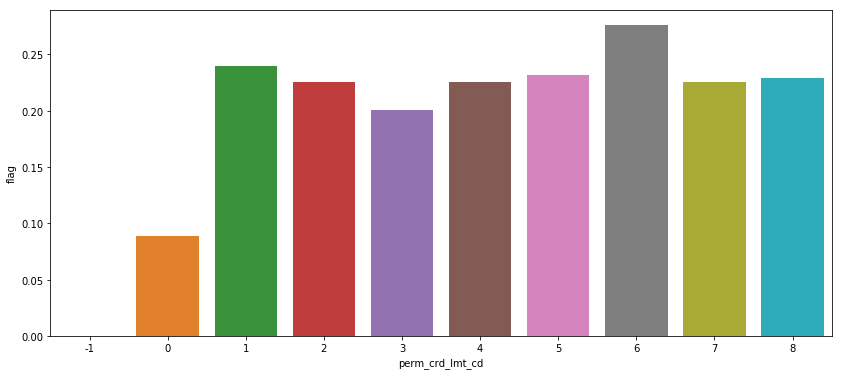

In [98]:
#perm_crd_lmt_cd
plt.figure(figsize=(14,6))
perm_crd_lmt_cd_flag=combine[:39923][['perm_crd_lmt_cd', 'flag']].groupby(['perm_crd_lmt_cd'],as_index=False).mean()
sns.barplot(x='perm_crd_lmt_cd', y='flag',data=perm_crd_lmt_cd_flag)
print(combine.perm_crd_lmt_cd.isnull().sum())
print("_______")
combine.perm_crd_lmt_cd.describe()

0
_______


count    43923.000000
mean        34.298750
std          8.529079
min         19.000000
25%         28.000000
50%         33.000000
75%         39.000000
max         84.000000
Name: age, dtype: float64

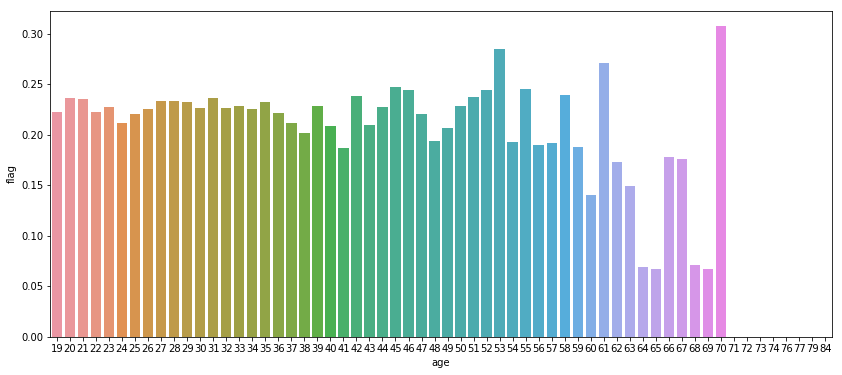

In [99]:
#age
plt.figure(figsize=(14,6))
age_flag=combine[:39923][['age', 'flag']].groupby(['age'],as_index=False).mean()
sns.barplot(x='age', y='flag',data=age_flag)
print(combine.age.isnull().sum())
print("_______")
combine.age.describe()

In [100]:
combine.loc[combine['age'] <20,'age'] = 1
combine.loc[(combine['age'] >= 20) & (combine['age'] < 25),'age'] = 2
combine.loc[(combine['age'] >= 25) & (combine['age'] < 30),'age'] = 3
combine.loc[(combine['age'] >= 30) & (combine['age'] < 35),'age'] = 4
combine.loc[(combine['age'] >= 35) & (combine['age'] < 40),'age'] = 5
combine.loc[(combine['age'] >= 40) & (combine['age'] < 45),'age'] = 6
combine.loc[(combine['age'] >= 45) & (combine['age'] < 50),'age'] = 7
combine.loc[(combine['age'] >= 50) & (combine['age'] < 55),'age'] = 8
combine.loc[(combine['age'] >= 55) & (combine['age'] < 60),'age'] = 9
combine.loc[(combine['age'] >= 60) & (combine['age'] < 65),'age'] = 10
combine.loc[(combine['age'] >= 65) & (combine['age'] < 70),'age'] = 11
combine.loc[combine['age'] >= 70,'age'] = 12
combine['age'].describe()


count    43923.000000
mean         4.462491
std          1.723320
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max         12.000000
Name: age, dtype: float64

822
_______


count     43101
unique        2
top           M
freq      25282
Name: gdr_cd, dtype: object

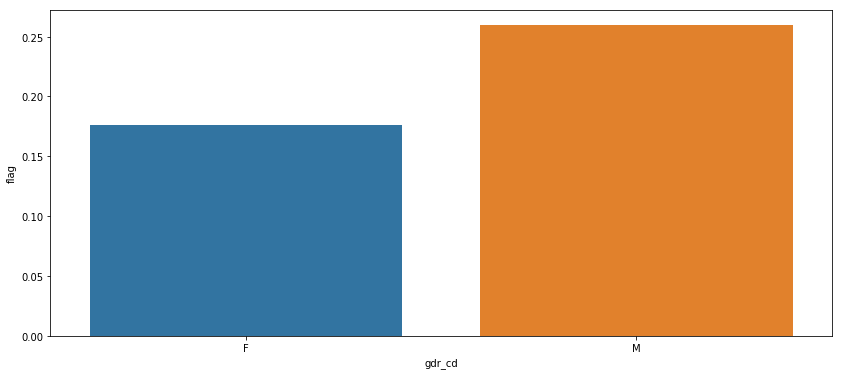

In [101]:
#gdr_cd
plt.figure(figsize=(14,6))
gdr_cd_flag=combine[:39923][['gdr_cd', 'flag']].groupby(['gdr_cd'],as_index=False).mean()
sns.barplot(x='gdr_cd', y='flag',data=gdr_cd_flag)
print(combine.gdr_cd.isnull().sum())
print("_______")
combine.gdr_cd.describe()

In [102]:
combine.gdr_cd[combine.gdr_cd.isnull()]=combine.gdr_cd.dropna().mode().values
print(combine.gdr_cd.isnull().sum())

0


In [103]:
combine['gdr_cd'] = combine['gdr_cd'].map( {'F': 1, 'M': 0} ).astype('int64')

822
_______


count     43101
unique        5
top           A
freq      21081
Name: mrg_situ_cd, dtype: object

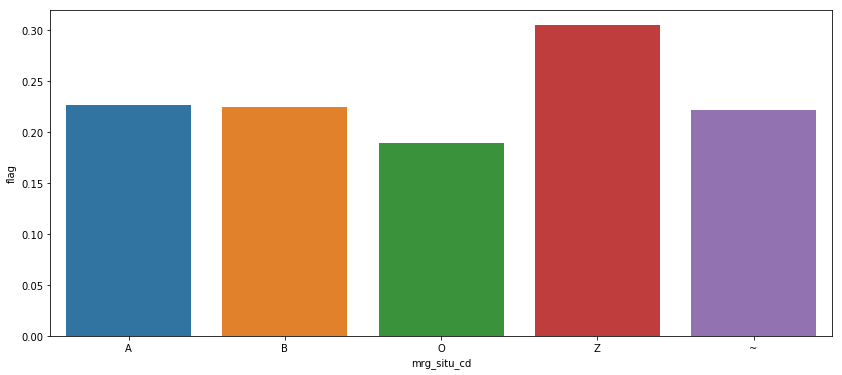

In [104]:
#mrg_situ_cd
plt.figure(figsize=(14,6))
mrg_situ_cd_flag=combine[:39923][['mrg_situ_cd', 'flag']].groupby(['mrg_situ_cd'],as_index=False).mean()
sns.barplot(x='mrg_situ_cd', y='flag',data=mrg_situ_cd_flag)
print(combine.mrg_situ_cd.isnull().sum())
print("_______")
combine.mrg_situ_cd.describe()


In [105]:
combine.mrg_situ_cd[combine.mrg_situ_cd.isnull()]=combine.mrg_situ_cd.dropna().mode().values
print(combine.mrg_situ_cd.isnull().sum())

0


In [106]:
combine['mrg_situ_cd'] = combine['mrg_situ_cd'].map( {'A': 1, 'B': 2,'O':3,'Z':4,'~':5} ).astype('int64')

823
_______


count     43100
unique        7
top           G
freq      14627
Name: acdm_deg_cd, dtype: object

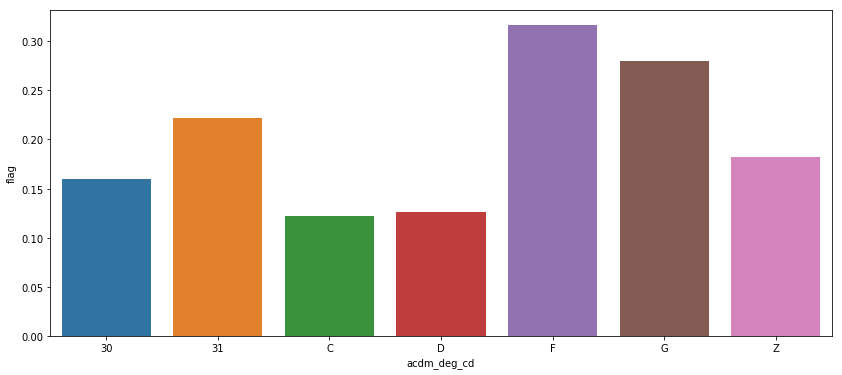

In [107]:
#acdm_deg_cd
plt.figure(figsize=(14,6))
acdm_deg_cd_flag=combine[:39923][['acdm_deg_cd', 'flag']].groupby(['acdm_deg_cd'],as_index=False).mean()
sns.barplot(x='acdm_deg_cd', y='flag',data=acdm_deg_cd_flag)
print(combine.acdm_deg_cd.isnull().sum())
print("_______")
combine.acdm_deg_cd.describe()


In [108]:
combine.acdm_deg_cd[combine.acdm_deg_cd.isnull()]=combine.acdm_deg_cd.dropna().mode().values
print(combine.acdm_deg_cd.isnull().sum())

0


In [109]:
combine['acdm_deg_cd'] = combine['acdm_deg_cd'].map( {'30': 1, '31': 2, 'C':3, 'D':4 , 'F':5 , 'G':6 , 'Z':7 } ).astype('int64')


545
_______


count     43378
unique       45
top           0
freq      18991
Name: job_year, dtype: object

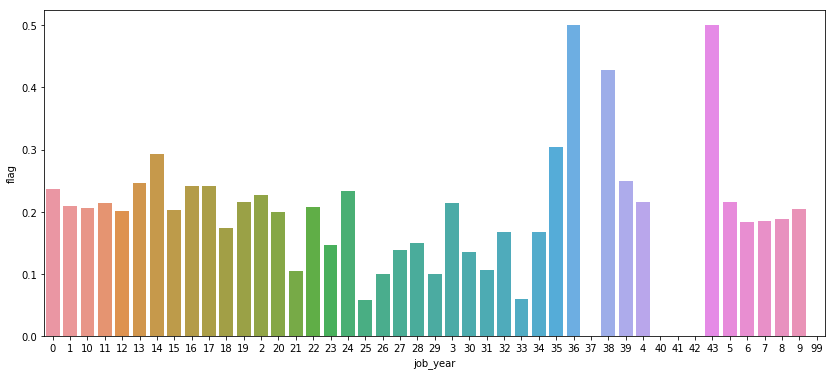

In [110]:
#job_year
plt.figure(figsize=(14,6))
job_year_flag=combine[:39923][['job_year', 'flag']].groupby(['job_year'],as_index=False).mean()
sns.barplot(x='job_year', y='flag',data=job_year_flag)
print(combine.job_year.isnull().sum())
print("_______")
combine.job_year.describe()

In [111]:
combine.job_year=combine.job_year.fillna(-1)
combine['job_year']=combine['job_year'].astype('int64')

In [112]:
combine.loc[combine['job_year'] >=38,'job_year'] = 38
combine['job_year'].describe()

count    43923.000000
mean         2.769415
std          5.021475
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         38.000000
Name: job_year, dtype: float64

545
_______


count     43378
unique        2
top           0
freq      42472
Name: ic_ind, dtype: object

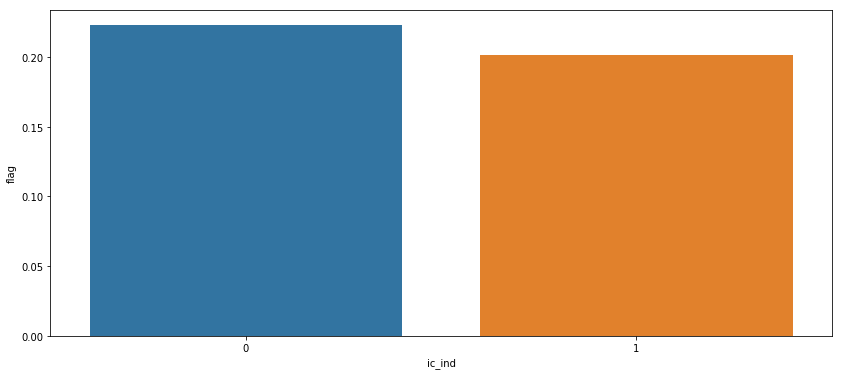

In [113]:
#ic_ind
plt.figure(figsize=(14,6))
ic_ind_flag=combine[:39923][['ic_ind', 'flag']].groupby(['ic_ind'],as_index=False).mean()
sns.barplot(x='ic_ind', y='flag',data=ic_ind_flag)
print(combine.ic_ind.isnull().sum())
print("_______")
combine.ic_ind.describe()

In [114]:
combine.ic_ind[combine.ic_ind.isnull()]=combine.ic_ind.dropna().mode().values
print(combine.ic_ind.isnull().sum())

0


545
_______


count     43378
unique        2
top           0
freq      37672
Name: fr_or_sh_ind, dtype: object

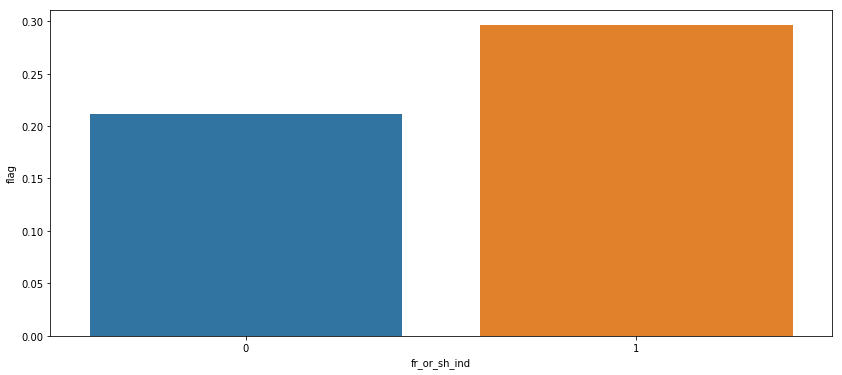

In [115]:
#fr_or_sh_ind
plt.figure(figsize=(14,6))
fr_or_sh_ind_flag=combine[:39923][['fr_or_sh_ind', 'flag']].groupby(['fr_or_sh_ind'],as_index=False).mean()
sns.barplot(x='fr_or_sh_ind', y='flag',data=fr_or_sh_ind_flag)
print(combine.fr_or_sh_ind.isnull().sum())
print("_______")
combine.fr_or_sh_ind.describe()

In [116]:

combine.fr_or_sh_ind[combine.fr_or_sh_ind.isnull()]=combine.fr_or_sh_ind.dropna().mode().values
print(combine.fr_or_sh_ind.isnull().sum())

0


545
_______


count     43378
unique        2
top           1
freq      25838
Name: dnl_mbl_bnk_ind, dtype: object

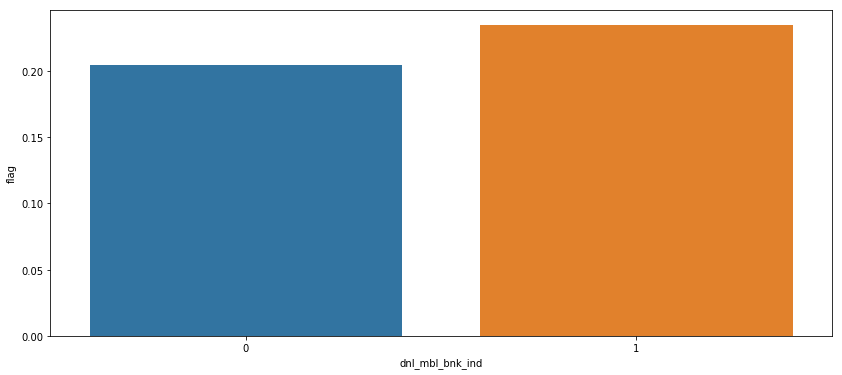

In [117]:
#dnl_mbl_bnk_ind
plt.figure(figsize=(14,6))
dnl_mbl_bnk_ind_flag=combine[:39923][['dnl_mbl_bnk_ind', 'flag']].groupby(['dnl_mbl_bnk_ind'],as_index=False).mean()
sns.barplot(x='dnl_mbl_bnk_ind', y='flag',data=dnl_mbl_bnk_ind_flag)
print(combine.dnl_mbl_bnk_ind.isnull().sum())
print("_______")
combine.dnl_mbl_bnk_ind.describe()

In [118]:
combine.dnl_mbl_bnk_ind[combine.dnl_mbl_bnk_ind.isnull()]=combine.dnl_mbl_bnk_ind.dropna().mode().values
print(combine.dnl_mbl_bnk_ind.isnull().sum())

0


545
_______


count     43378
unique        2
top           1
freq      35660
Name: dnl_bind_cmb_lif_ind, dtype: object

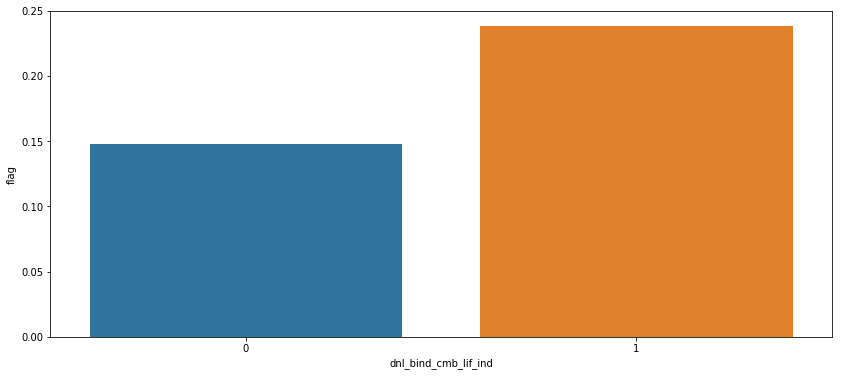

In [119]:
#dnl_bind_cmb_lif_ind
plt.figure(figsize=(14,6))
dnl_bind_cmb_lif_ind_flag=combine[:39923][['dnl_bind_cmb_lif_ind', 'flag']].groupby(['dnl_bind_cmb_lif_ind'],as_index=False).mean()
sns.barplot(x='dnl_bind_cmb_lif_ind', y='flag',data=dnl_bind_cmb_lif_ind_flag)
print(combine.dnl_bind_cmb_lif_ind.isnull().sum())
print("_______")
combine.dnl_bind_cmb_lif_ind.describe()

In [120]:

combine.dnl_bind_cmb_lif_ind[combine.dnl_bind_cmb_lif_ind.isnull()]=combine.dnl_bind_cmb_lif_ind.dropna().mode().values
print(combine.dnl_bind_cmb_lif_ind.isnull().sum())

0


552
_______


count     43371
unique        2
top           0
freq      26255
Name: hav_car_grp_ind, dtype: object

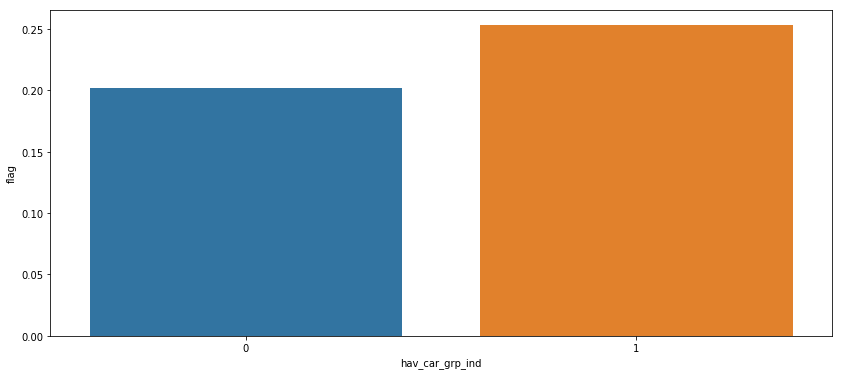

In [121]:
#hav_car_grp_ind
plt.figure(figsize=(14,6))
hav_car_grp_ind_flag=combine[:39923][['hav_car_grp_ind', 'flag']].groupby(['hav_car_grp_ind'],as_index=False).mean()
sns.barplot(x='hav_car_grp_ind', y='flag',data=hav_car_grp_ind_flag)
print(combine.hav_car_grp_ind.isnull().sum())
print("_______")
combine.hav_car_grp_ind.describe()

In [122]:

combine.hav_car_grp_ind[combine.hav_car_grp_ind.isnull()]=combine.hav_car_grp_ind.dropna().mode().values
print(combine.hav_car_grp_ind.isnull().sum())

0


545
_______


count     43378
unique        2
top           0
freq      42741
Name: hav_hou_grp_ind, dtype: object

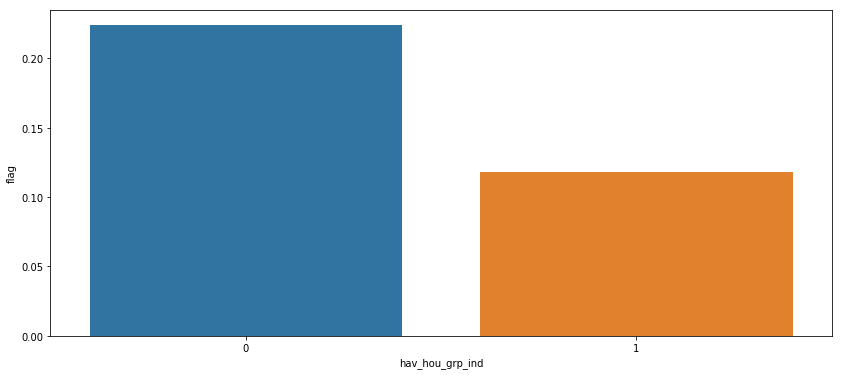

In [123]:
#hav_hou_grp_ind
plt.figure(figsize=(14,6))
hav_hou_grp_ind_flag=combine[:39923][['hav_hou_grp_ind', 'flag']].groupby(['hav_hou_grp_ind'],as_index=False).mean()
sns.barplot(x='hav_hou_grp_ind', y='flag',data=hav_hou_grp_ind_flag)
print(combine.hav_hou_grp_ind.isnull().sum())
print("_______")
combine.hav_hou_grp_ind.describe()

In [124]:
combine.hav_hou_grp_ind[combine.hav_hou_grp_ind.isnull()]=combine.hav_hou_grp_ind.dropna().mode().values
print(combine.hav_hou_grp_ind.isnull().sum())

0


552
_______


count     43371
unique        2
top           0
freq      38445
Name: l6mon_agn_ind, dtype: object

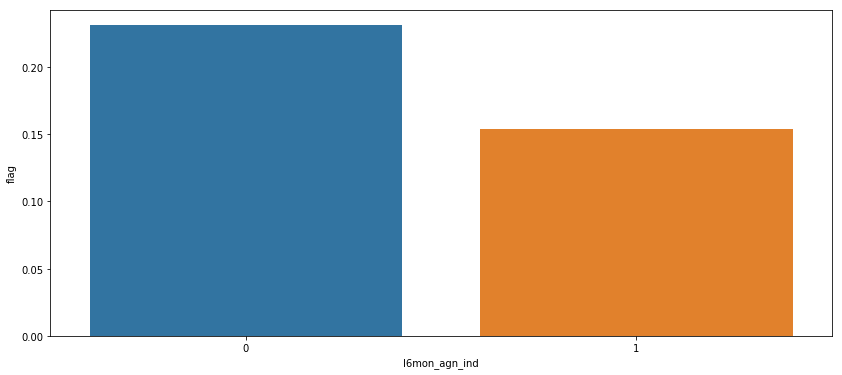

In [125]:
#l6mon_agn_ind
plt.figure(figsize=(14,6))
l6mon_agn_ind_flag=combine[:39923][['l6mon_agn_ind', 'flag']].groupby(['l6mon_agn_ind'],as_index=False).mean()
sns.barplot(x='l6mon_agn_ind', y='flag',data=l6mon_agn_ind_flag)
print(combine.l6mon_agn_ind.isnull().sum())
print("_______")
combine.l6mon_agn_ind.describe()

In [126]:
combine.l6mon_agn_ind[combine.l6mon_agn_ind.isnull()]=combine.l6mon_agn_ind.dropna().mode().values
print(combine.l6mon_agn_ind.isnull().sum())

0


552
_______


count     43371
unique        2
top           0
freq      33949
Name: vld_rsk_ases_ind, dtype: object

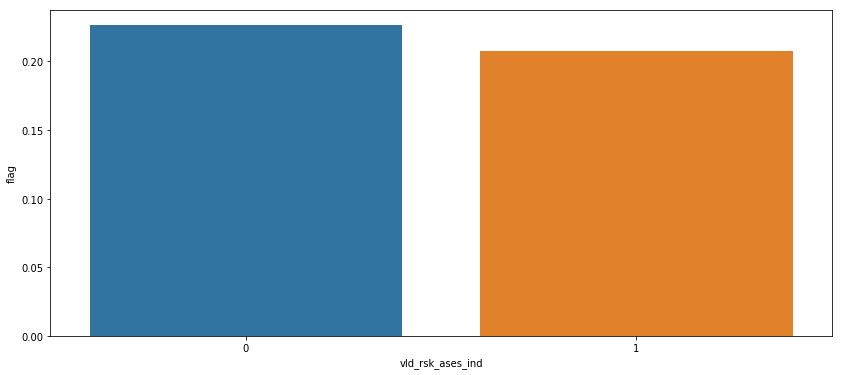

In [127]:
#vld_rsk_ases_ind
plt.figure(figsize=(14,6))
vld_rsk_ases_ind_flag=combine[:39923][['vld_rsk_ases_ind', 'flag']].groupby(['vld_rsk_ases_ind'],as_index=False).mean()
sns.barplot(x='vld_rsk_ases_ind', y='flag',data=vld_rsk_ases_ind_flag)
print(combine.vld_rsk_ases_ind.isnull().sum())
print("_______")
combine.vld_rsk_ases_ind.describe()

In [128]:
combine.vld_rsk_ases_ind[combine.vld_rsk_ases_ind.isnull()]=combine.vld_rsk_ases_ind.dropna().mode().values
print(combine.vld_rsk_ases_ind.isnull().sum())

0


545
_______


count     43378
unique       12
top          -1
freq      33956
Name: fin_rsk_ases_grd_cd, dtype: object

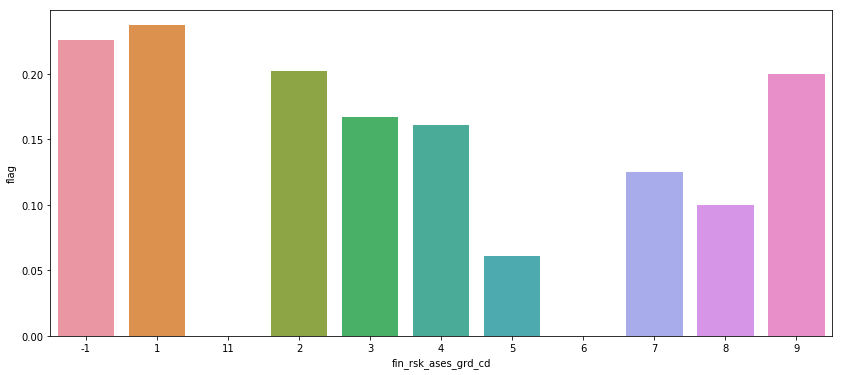

In [129]:
#fin_rsk_ases_grd_cd
plt.figure(figsize=(14,6))
fin_rsk_ases_grd_cd_flag=combine[:39923][['fin_rsk_ases_grd_cd', 'flag']].groupby(['fin_rsk_ases_grd_cd'],as_index=False).mean()
sns.barplot(x='fin_rsk_ases_grd_cd', y='flag',data=fin_rsk_ases_grd_cd_flag)
print(combine.fin_rsk_ases_grd_cd.isnull().sum())
print("_______")
combine.fin_rsk_ases_grd_cd.describe()

In [130]:
combine.fin_rsk_ases_grd_cd=combine.fin_rsk_ases_grd_cd.fillna(0)
combine['fin_rsk_ases_grd_cd']=combine['fin_rsk_ases_grd_cd'].astype('int64')

In [131]:
combine.loc[combine['fin_rsk_ases_grd_cd'] >=6,'fin_rsk_ases_grd_cd'] = 6

combine['fin_rsk_ases_grd_cd'].describe()

count    43923.000000
mean        -0.366778
std          1.271213
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max          6.000000
Name: fin_rsk_ases_grd_cd, dtype: float64

545
_______


count     43378
unique       13
top          -1
freq      30311
Name: confirm_rsk_ases_lvl_typ_cd, dtype: object

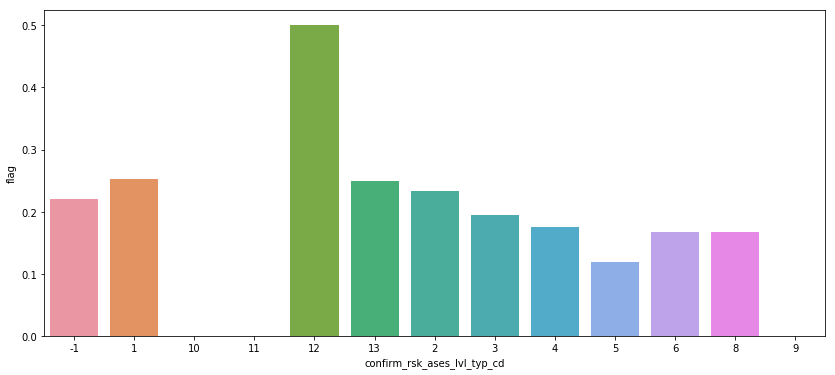

In [132]:
#confirm_rsk_ases_lvl_typ_cd
plt.figure(figsize=(14,6))
confirm_rsk_ases_lvl_typ_cd_flag=combine[:39923][['confirm_rsk_ases_lvl_typ_cd', 'flag']].groupby(['confirm_rsk_ases_lvl_typ_cd'],as_index=False).mean()
sns.barplot(x='confirm_rsk_ases_lvl_typ_cd', y='flag',data=confirm_rsk_ases_lvl_typ_cd_flag)
print(combine.confirm_rsk_ases_lvl_typ_cd.isnull().sum())
print("_______")
combine.confirm_rsk_ases_lvl_typ_cd.describe()

In [133]:
combine.confirm_rsk_ases_lvl_typ_cd=combine.confirm_rsk_ases_lvl_typ_cd.fillna(0)
combine['confirm_rsk_ases_lvl_typ_cd']=combine['confirm_rsk_ases_lvl_typ_cd'].astype('int64')

In [134]:
combine.loc[combine['confirm_rsk_ases_lvl_typ_cd'] >=8,'confirm_rsk_ases_lvl_typ_cd'] = 8
combine['confirm_rsk_ases_lvl_typ_cd'].describe()

count    43923.000000
mean        -0.088564
std          1.500736
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          1.000000
max          8.000000
Name: confirm_rsk_ases_lvl_typ_cd, dtype: float64

552
_______


count     43371
unique        9
top           1
freq      41866
Name: cust_inv_rsk_endu_lvl_cd, dtype: object

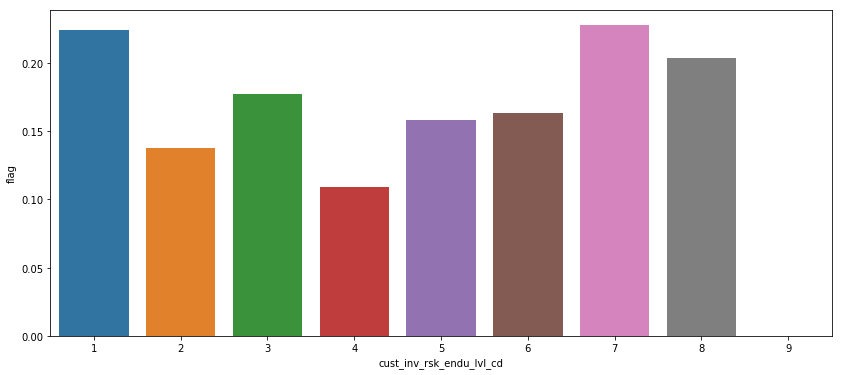

In [135]:
#cust_inv_rsk_endu_lvl_cd
plt.figure(figsize=(14,6))
cust_inv_rsk_endu_lvl_cd_flag=combine[:39923][['cust_inv_rsk_endu_lvl_cd', 'flag']].groupby(['cust_inv_rsk_endu_lvl_cd'],as_index=False).mean()
sns.barplot(x='cust_inv_rsk_endu_lvl_cd', y='flag',data=cust_inv_rsk_endu_lvl_cd_flag)
print(combine.cust_inv_rsk_endu_lvl_cd.isnull().sum())
print("_______")
combine.cust_inv_rsk_endu_lvl_cd.describe()

In [136]:
combine.cust_inv_rsk_endu_lvl_cd=combine.cust_inv_rsk_endu_lvl_cd.fillna(0)
combine['cust_inv_rsk_endu_lvl_cd']=combine['cust_inv_rsk_endu_lvl_cd'].astype('int64')

In [137]:
combine.loc[combine['cust_inv_rsk_endu_lvl_cd'] >=8,'cust_inv_rsk_endu_lvl_cd'] = 8

combine['cust_inv_rsk_endu_lvl_cd'].describe()

count    43923.000000
mean         1.128247
std          0.831408
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: cust_inv_rsk_endu_lvl_cd, dtype: float64

0
_______


count    43923.000000
mean         0.877126
std          1.358842
min         -1.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          9.000000
Name: l6mon_daim_aum_cd, dtype: float64

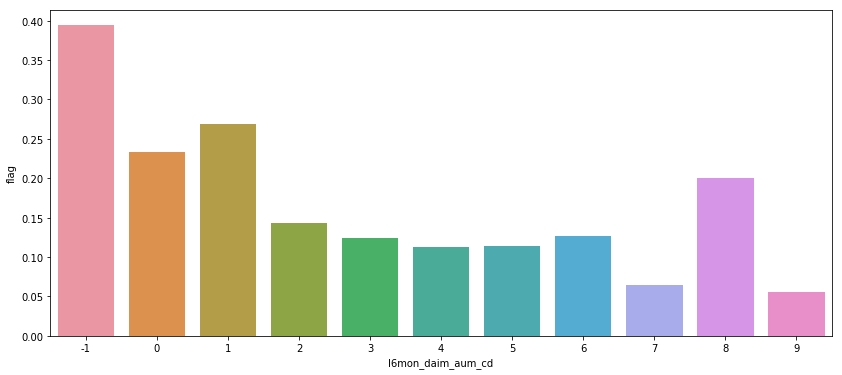

In [138]:
#l6mon_daim_aum_cd
plt.figure(figsize=(14,6))
l6mon_daim_aum_cd_flag=combine[:39923][['l6mon_daim_aum_cd', 'flag']].groupby(['l6mon_daim_aum_cd'],as_index=False).mean()
sns.barplot(x='l6mon_daim_aum_cd', y='flag',data=l6mon_daim_aum_cd_flag)
print(combine.l6mon_daim_aum_cd.isnull().sum())
print("_______")
combine.l6mon_daim_aum_cd.describe()

552
_______


count     43371
unique       14
top          -1
freq      33467
Name: tot_ast_lvl_cd, dtype: object

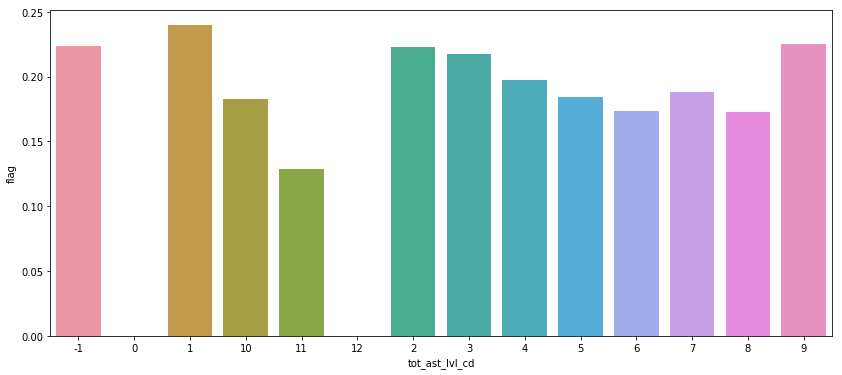

In [139]:
#tot_ast_lvl_cd
plt.figure(figsize=(14,6))
tot_ast_lvl_cd_flag=combine[:39923][['tot_ast_lvl_cd', 'flag']].groupby(['tot_ast_lvl_cd'],as_index=False).mean()
sns.barplot(x='tot_ast_lvl_cd', y='flag',data=tot_ast_lvl_cd_flag)
print(combine.tot_ast_lvl_cd.isnull().sum())
print("_______")
combine.tot_ast_lvl_cd.describe()

In [140]:
combine.tot_ast_lvl_cd=combine.tot_ast_lvl_cd.fillna(-2)
combine['tot_ast_lvl_cd']=combine['tot_ast_lvl_cd'].astype('int64')

In [141]:
combine.loc[combine['tot_ast_lvl_cd'] ==0,'tot_ast_lvl_cd'] = -1
combine.loc[combine['tot_ast_lvl_cd'] >=11,'tot_ast_lvl_cd'] = 11

combine['tot_ast_lvl_cd'].describe()

count    43923.000000
mean        -0.128247
std          1.917452
min         -2.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max         11.000000
Name: tot_ast_lvl_cd, dtype: float64

552
_______


count     43371
unique        7
top          -1
freq      18357
Name: pot_ast_lvl_cd, dtype: object

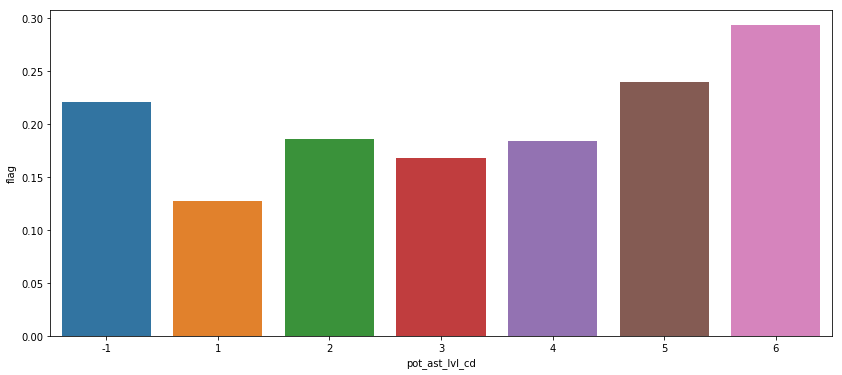

In [142]:
#pot_ast_lvl_cd
plt.figure(figsize=(14,6))
pot_ast_lvl_cd_flag=combine[:39923][['pot_ast_lvl_cd', 'flag']].groupby(['pot_ast_lvl_cd'],as_index=False).mean()
sns.barplot(x='pot_ast_lvl_cd', y='flag',data=pot_ast_lvl_cd_flag)
print(combine.pot_ast_lvl_cd.isnull().sum())
print("_______")
combine.pot_ast_lvl_cd.describe()

In [143]:
combine.pot_ast_lvl_cd=combine.pot_ast_lvl_cd.fillna(0)
combine['pot_ast_lvl_cd']=combine['pot_ast_lvl_cd'].astype('int64')

552
_______


count     43371
unique       70
top           0
freq      42174
Name: l12mon_buy_fin_mng_whl_tms, dtype: object

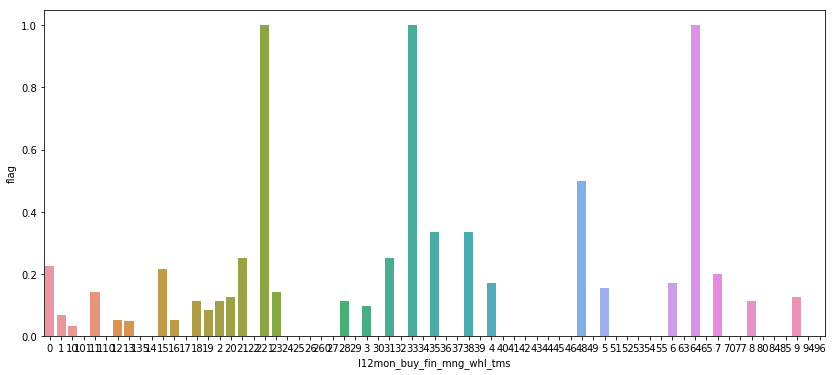

In [144]:
#l12mon_buy_fin_mng_whl_tms
plt.figure(figsize=(14,6))
l12mon_buy_fin_mng_whl_tms_flag=combine[:39923][['l12mon_buy_fin_mng_whl_tms', 'flag']].groupby(['l12mon_buy_fin_mng_whl_tms'],as_index=False).mean()
sns.barplot(x='l12mon_buy_fin_mng_whl_tms', y='flag',data=l12mon_buy_fin_mng_whl_tms_flag)
print(combine.l12mon_buy_fin_mng_whl_tms.isnull().sum())
print("_______")
combine.l12mon_buy_fin_mng_whl_tms.describe()

In [145]:
combine.l12mon_buy_fin_mng_whl_tms=combine.l12mon_buy_fin_mng_whl_tms.fillna(-1)
combine['l12mon_buy_fin_mng_whl_tms']=combine['l12mon_buy_fin_mng_whl_tms'].astype('int64')

In [146]:
combine.loc[(combine['l12mon_buy_fin_mng_whl_tms'] >= 10) & (combine['l12mon_buy_fin_mng_whl_tms'] <=99),
            'l12mon_buy_fin_mng_whl_tms'] = 10
combine.loc[combine['l12mon_buy_fin_mng_whl_tms'] >= 100 ,'l12mon_buy_fin_mng_whl_tms'] = 11

combine['l12mon_buy_fin_mng_whl_tms'].describe()

count    43923.000000
mean         0.139312
std          1.093304
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: l12mon_buy_fin_mng_whl_tms, dtype: float64

552
_______


count     43371
unique      106
top           0
freq      39518
Name: l12_mon_fnd_buy_whl_tms, dtype: object

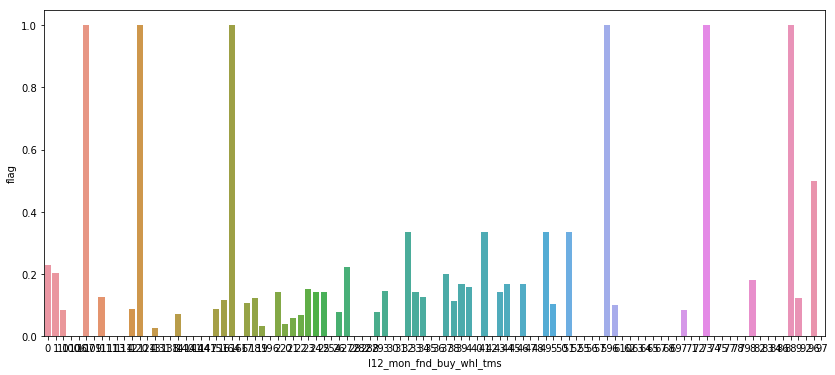

In [147]:
#l12_mon_fnd_buy_whl_tms
plt.figure(figsize=(14,6))
l12_mon_fnd_buy_whl_tms_flag=combine[:39923][['l12_mon_fnd_buy_whl_tms', 'flag']].groupby(['l12_mon_fnd_buy_whl_tms'],as_index=False).mean()
sns.barplot(x='l12_mon_fnd_buy_whl_tms', y='flag',data=l12_mon_fnd_buy_whl_tms_flag)
print(combine.l12_mon_fnd_buy_whl_tms.isnull().sum())
print("_______")
combine.l12_mon_fnd_buy_whl_tms.describe()

In [148]:
combine.l12_mon_fnd_buy_whl_tms=combine.l12_mon_fnd_buy_whl_tms.fillna(-1)
combine['l12_mon_fnd_buy_whl_tms']=combine['l12_mon_fnd_buy_whl_tms'].astype('int64')

In [149]:
combine.loc[(combine['l12_mon_fnd_buy_whl_tms'] >= 10) & (combine['l12_mon_fnd_buy_whl_tms'] <=99),
            'l12_mon_fnd_buy_whl_tms'] = 10
combine.loc[combine['l12_mon_fnd_buy_whl_tms'] >= 100 ,'l12_mon_fnd_buy_whl_tms'] = 11

combine['l12_mon_fnd_buy_whl_tms'].describe()

count    43923.000000
mean         0.331216
std          1.559072
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         11.000000
Name: l12_mon_fnd_buy_whl_tms, dtype: float64

552
_______


count     43371
unique        8
top           0
freq      43289
Name: l12_mon_insu_buy_whl_tms, dtype: object

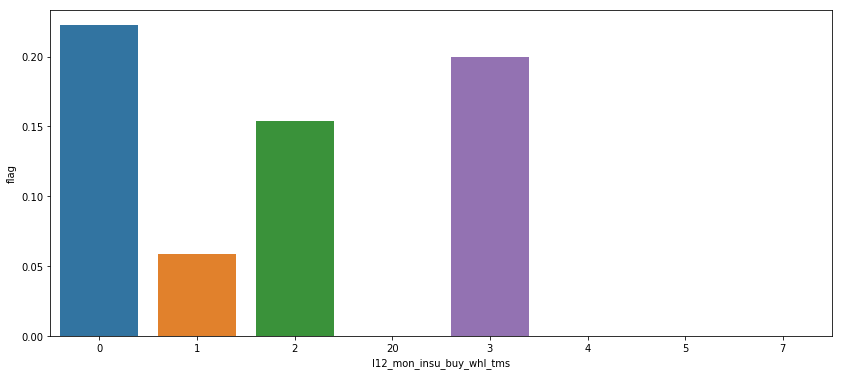

In [150]:
#l12_mon_insu_buy_whl_tms
plt.figure(figsize=(14,6))
l12_mon_insu_buy_whl_tms_flag=combine[:39923][['l12_mon_insu_buy_whl_tms', 'flag']].groupby(['l12_mon_insu_buy_whl_tms'],as_index=False).mean()
sns.barplot(x='l12_mon_insu_buy_whl_tms', y='flag',data=l12_mon_insu_buy_whl_tms_flag)
print(combine.l12_mon_insu_buy_whl_tms.isnull().sum())
print("_______")
combine.l12_mon_insu_buy_whl_tms.describe()

In [151]:
combine.l12_mon_insu_buy_whl_tms=combine.l12_mon_insu_buy_whl_tms.fillna(-1)
combine['l12_mon_insu_buy_whl_tms']=combine['l12_mon_insu_buy_whl_tms'].astype('int64')

In [152]:
combine.loc[combine['l12_mon_insu_buy_whl_tms'] >=3,'l12_mon_insu_buy_whl_tms'] = 3
combine['l12_mon_insu_buy_whl_tms'].describe()

count    43923.000000
mean        -0.009881
std          0.131344
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          3.000000
Name: l12_mon_insu_buy_whl_tms, dtype: float64

552
_______


count     43371
unique       16
top           0
freq      43312
Name: l12_mon_gld_buy_whl_tms, dtype: object

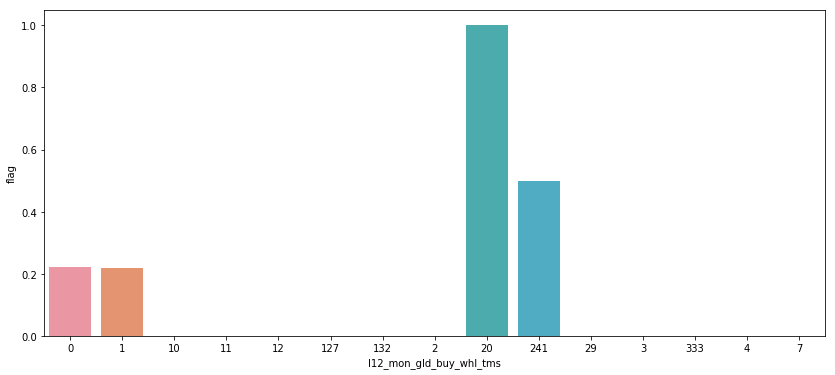

In [153]:
#l12_mon_gld_buy_whl_tms
plt.figure(figsize=(14,6))
l12_mon_gld_buy_whl_tms_flag=combine[:39923][['l12_mon_gld_buy_whl_tms', 'flag']].groupby(['l12_mon_gld_buy_whl_tms'],as_index=False).mean()
sns.barplot(x='l12_mon_gld_buy_whl_tms', y='flag',data=l12_mon_gld_buy_whl_tms_flag)
print(combine.l12_mon_gld_buy_whl_tms.isnull().sum())
print("_______")
combine.l12_mon_gld_buy_whl_tms.describe()

In [154]:
combine.l12_mon_gld_buy_whl_tms=combine.l12_mon_gld_buy_whl_tms.fillna(-1)
combine['l12_mon_gld_buy_whl_tms']=combine['l12_mon_gld_buy_whl_tms'].astype('int64')

In [155]:
combine.loc[combine['l12_mon_gld_buy_whl_tms'] >=2,'l12_mon_gld_buy_whl_tms'] = 2
combine['l12_mon_gld_buy_whl_tms'].describe()

count    43923.000000
mean        -0.010655
std          0.124519
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: l12_mon_gld_buy_whl_tms, dtype: float64

545
_______


count     43378
unique        2
top           0
freq      40939
Name: loan_act_ind, dtype: object

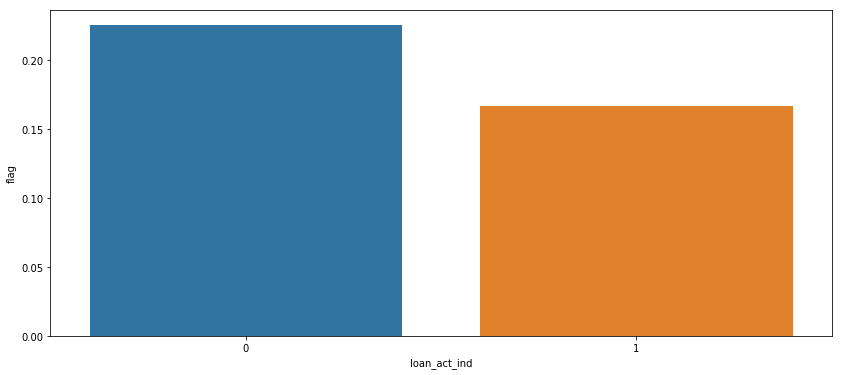

In [156]:
#loan_act_ind
plt.figure(figsize=(14,6))
loan_act_ind_flag=combine[:39923][['loan_act_ind', 'flag']].groupby(['loan_act_ind'],as_index=False).mean()
sns.barplot(x='loan_act_ind', y='flag',data=loan_act_ind_flag)
print(combine.loan_act_ind.isnull().sum())
print("_______")
combine.loan_act_ind.describe()

In [157]:
combine.loan_act_ind[combine.loan_act_ind.isnull()]=combine.loan_act_ind.dropna().mode().values
print(combine.loan_act_ind.isnull().sum())

0


545
_______


count     43378
unique       11
top           0
freq      43208
Name: ovd_30d_loan_tot_cnt, dtype: object

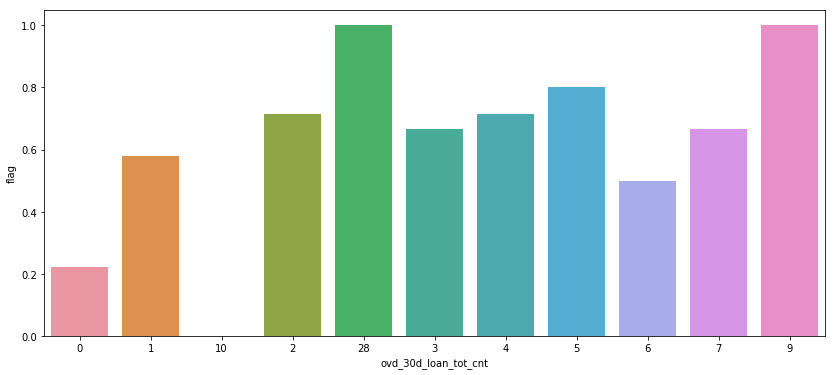

In [158]:
#ovd_30d_loan_tot_cnt
plt.figure(figsize=(14,6))
ovd_30d_loan_tot_cnt_flag=combine[:39923][['ovd_30d_loan_tot_cnt', 'flag']].groupby(['ovd_30d_loan_tot_cnt'],as_index=False).mean()
sns.barplot(x='ovd_30d_loan_tot_cnt', y='flag',data=ovd_30d_loan_tot_cnt_flag)
print(combine.ovd_30d_loan_tot_cnt.isnull().sum())
print("_______")
combine.ovd_30d_loan_tot_cnt.describe()

In [159]:
combine.ovd_30d_loan_tot_cnt=combine.ovd_30d_loan_tot_cnt.fillna(-1)
combine['ovd_30d_loan_tot_cnt']=combine['ovd_30d_loan_tot_cnt'].astype('int64')

In [160]:
combine.loc[combine['ovd_30d_loan_tot_cnt'] >= 4,'ovd_30d_loan_tot_cnt'] = 4
combine['ovd_30d_loan_tot_cnt'].describe()

count    43923.000000
mean        -0.005350
std          0.173079
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: ovd_30d_loan_tot_cnt, dtype: float64

545
_______


count     43378
unique      139
top           0
freq      42727
Name: his_lng_ovd_day, dtype: object

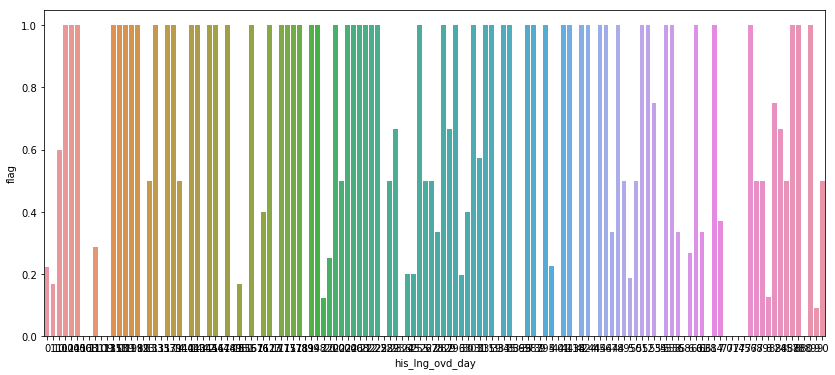

In [161]:
#his_lng_ovd_day
plt.figure(figsize=(14,6))
his_lng_ovd_day_flag=combine[:39923][['his_lng_ovd_day', 'flag']].groupby(['his_lng_ovd_day'],as_index=False).mean()
sns.barplot(x='his_lng_ovd_day', y='flag',data=his_lng_ovd_day_flag)
print(combine.his_lng_ovd_day.isnull().sum())
print("_______")
combine.his_lng_ovd_day.describe()

In [162]:
combine.his_lng_ovd_day=combine.his_lng_ovd_day.fillna(-1)
combine['his_lng_ovd_day']=combine['his_lng_ovd_day'].astype('int64')

In [163]:
combine.loc[(combine['his_lng_ovd_day'] >=1) & (combine['his_lng_ovd_day'] < 30),'his_lng_ovd_day'] =1
combine.loc[(combine['his_lng_ovd_day'] >=30) & (combine['his_lng_ovd_day'] < 60),'his_lng_ovd_day'] =2
combine.loc[(combine['his_lng_ovd_day'] >=60) & (combine['his_lng_ovd_day'] < 90),'his_lng_ovd_day'] =3
combine.loc[(combine['his_lng_ovd_day'] >=90) & (combine['his_lng_ovd_day'] < 180),'his_lng_ovd_day'] =4
combine.loc[(combine['his_lng_ovd_day'] >=180) & (combine['his_lng_ovd_day'] < 365),'his_lng_ovd_day'] =5
combine.loc[(combine['his_lng_ovd_day'] >=365) & (combine['his_lng_ovd_day'] < 1095),'his_lng_ovd_day'] =6
combine.loc[combine['his_lng_ovd_day'] >= 1096,'his_lng_ovd_day'] = 7
combine['his_lng_ovd_day'].describe()

count    43923.000000
mean         0.012317
std          0.283429
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: his_lng_ovd_day, dtype: float64

In [164]:
#frs_agn_dt_cnt
print(combine.frs_agn_dt_cnt.isnull().sum())
print("_______")
combine.frs_agn_dt_cnt.describe()

552
_______


count     43371
unique     1022
top          -1
freq      33727
Name: frs_agn_dt_cnt, dtype: object

In [165]:
combine.frs_agn_dt_cnt=combine.frs_agn_dt_cnt.fillna(0)
combine['frs_agn_dt_cnt']=combine['frs_agn_dt_cnt'].astype('int64')

In [166]:
combine.loc[(combine['frs_agn_dt_cnt'] >=1) & (combine['frs_agn_dt_cnt'] < 30),'frs_agn_dt_cnt'] =1
combine.loc[(combine['frs_agn_dt_cnt'] >=30) & (combine['frs_agn_dt_cnt'] < 60),'frs_agn_dt_cnt'] =2
combine.loc[(combine['frs_agn_dt_cnt'] >=60) & (combine['frs_agn_dt_cnt'] < 90),'frs_agn_dt_cnt'] =3
combine.loc[(combine['frs_agn_dt_cnt'] >=90) & (combine['frs_agn_dt_cnt'] < 180),'frs_agn_dt_cnt'] =4
combine.loc[(combine['frs_agn_dt_cnt'] >=180) & (combine['frs_agn_dt_cnt'] < 365),'frs_agn_dt_cnt'] =5
combine.loc[(combine['frs_agn_dt_cnt'] >=365) & (combine['frs_agn_dt_cnt'] < 1095),'frs_agn_dt_cnt'] =6
combine.loc[combine['frs_agn_dt_cnt'] >= 1096,'frs_agn_dt_cnt'] = 7
combine['frs_agn_dt_cnt'].describe()

count    43923.000000
mean         0.623887
std          9.511724
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max       1095.000000
Name: frs_agn_dt_cnt, dtype: float64

In [167]:
delete2=['cur_debit_cnt','cur_debit_min_opn_dt_cnt','cur_debit_crd_lvl','frs_agn_dt_cnt','BCmean',
         'total_pay','inorout_ind','BB_ratio','BC_ratio','CQA_ratio','CQE_ratio','id']

In [168]:
combine=combine.drop(delete2,axis=1)

In [169]:
combine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43923 entries, 0 to 3999
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   flag                             43923 non-null  int64 
 1   gdr_cd                           43923 non-null  int64 
 2   age                              43923 non-null  int64 
 3   mrg_situ_cd                      43923 non-null  int64 
 4   acdm_deg_cd                      43923 non-null  int64 
 5   job_year                         43923 non-null  int64 
 6   ic_ind                           43923 non-null  object
 7   fr_or_sh_ind                     43923 non-null  object
 8   dnl_mbl_bnk_ind                  43923 non-null  object
 9   dnl_bind_cmb_lif_ind             43923 non-null  object
 10  hav_car_grp_ind                  43923 non-null  object
 11  hav_hou_grp_ind                  43923 non-null  object
 12  l6mon_agn_ind                    

In [170]:
train_data=combine[:39923]
test_data=combine[39923:]


train_data_X  = train_data.drop(['flag'],axis=1)
train_data_Y = train_data['flag']
test_data_X  = test_data.drop(['flag'],axis=1)

In [171]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 54 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   flag                             4000 non-null   int64 
 1   gdr_cd                           4000 non-null   int64 
 2   age                              4000 non-null   int64 
 3   mrg_situ_cd                      4000 non-null   int64 
 4   acdm_deg_cd                      4000 non-null   int64 
 5   job_year                         4000 non-null   int64 
 6   ic_ind                           4000 non-null   object
 7   fr_or_sh_ind                     4000 non-null   object
 8   dnl_mbl_bnk_ind                  4000 non-null   object
 9   dnl_bind_cmb_lif_ind             4000 non-null   object
 10  hav_car_grp_ind                  4000 non-null   object
 11  hav_hou_grp_ind                  4000 non-null   object
 12  l6mon_agn_ind                    4

In [172]:
X_train = train_data_X.values  #Creates an array of the train data
X_test = test_data_X.values  #Creates an array of the test data
Y_train = train_data_Y.values 

In [173]:
# from lightgbm import LGBMClassifier
# lgB_model=LGBMClassifier()
# lgB_model.fit(X_train, Y_train)
# m=lgB_model.feature_importances_
# m
# # print("Done")
# # predictions_lgB = lgB_model.predict_proba(X_test)[:,1]
# # submission_lgB_model = pd.DataFrame({'Id':ID,'Label':predictions_lgB})
# # submission_lgB_model.to_csv('Fin_tech_final.txt',index=False,header=False,sep='\t')
# # print("生成文件")

In [174]:
from xgboost import XGBClassifier
xgbmodel=XGBClassifier(random_state=219)
xgbmodel.fit(X_train, Y_train)
print("Done")
predictions_xgb = xgbmodel.predict_proba(X_test)[:,1]
# submission_xgb = pd.DataFrame({'Id':ID,'Label':predictions_xgb})
# submission_xgb.to_csv('Fin_tech_511_3.txt',index=False,header=False,sep='\t')
# print("生成文件")

Done


In [175]:
from lightgbm import LGBMClassifier
lgB_model=LGBMClassifier(random_state=219)
lgB_model.fit(X_train, Y_train)
print("Done")
predictions_lgB = lgB_model.predict_proba(X_test)[:,1]
# submission_lgB_model = pd.DataFrame({'Id':ID,'Label':predictions_lgB})
# submission_lgB_model.to_csv('Fin_tech_final2.txt',index=False,header=False,sep='\t')
# print("生成文件")

Done


In [176]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier(random_state=219)
cat_model.fit(X_train, Y_train)
print("Done")
predictions_cat = cat_model.predict_proba(X_test)[:,1]

Learning rate set to 0.049734
0:	learn: 0.6712382	total: 111ms	remaining: 1m 51s
1:	learn: 0.6516305	total: 122ms	remaining: 1m 1s
2:	learn: 0.6341980	total: 137ms	remaining: 45.4s
3:	learn: 0.6192158	total: 154ms	remaining: 38.3s
4:	learn: 0.6044276	total: 169ms	remaining: 33.6s
5:	learn: 0.5915878	total: 185ms	remaining: 30.6s
6:	learn: 0.5799171	total: 200ms	remaining: 28.4s
7:	learn: 0.5700298	total: 213ms	remaining: 26.4s
8:	learn: 0.5601035	total: 226ms	remaining: 24.9s
9:	learn: 0.5518647	total: 239ms	remaining: 23.6s
10:	learn: 0.5442143	total: 251ms	remaining: 22.6s
11:	learn: 0.5390822	total: 263ms	remaining: 21.6s
12:	learn: 0.5331341	total: 278ms	remaining: 21.1s
13:	learn: 0.5284209	total: 291ms	remaining: 20.5s
14:	learn: 0.5230223	total: 305ms	remaining: 20s
15:	learn: 0.5183865	total: 318ms	remaining: 19.6s
16:	learn: 0.5143487	total: 331ms	remaining: 19.2s
17:	learn: 0.5104768	total: 345ms	remaining: 18.8s
18:	learn: 0.5066145	total: 361ms	remaining: 18.6s
19:	learn: 0

167:	learn: 0.4426827	total: 2.35s	remaining: 11.7s
168:	learn: 0.4426307	total: 2.37s	remaining: 11.6s
169:	learn: 0.4423993	total: 2.38s	remaining: 11.6s
170:	learn: 0.4422997	total: 2.39s	remaining: 11.6s
171:	learn: 0.4421696	total: 2.4s	remaining: 11.6s
172:	learn: 0.4421182	total: 2.41s	remaining: 11.5s
173:	learn: 0.4420117	total: 2.42s	remaining: 11.5s
174:	learn: 0.4418995	total: 2.44s	remaining: 11.5s
175:	learn: 0.4417676	total: 2.45s	remaining: 11.5s
176:	learn: 0.4416099	total: 2.46s	remaining: 11.4s
177:	learn: 0.4414586	total: 2.47s	remaining: 11.4s
178:	learn: 0.4413376	total: 2.48s	remaining: 11.4s
179:	learn: 0.4411762	total: 2.5s	remaining: 11.4s
180:	learn: 0.4410718	total: 2.51s	remaining: 11.3s
181:	learn: 0.4409049	total: 2.52s	remaining: 11.3s
182:	learn: 0.4408262	total: 2.53s	remaining: 11.3s
183:	learn: 0.4407237	total: 2.54s	remaining: 11.3s
184:	learn: 0.4406316	total: 2.55s	remaining: 11.2s
185:	learn: 0.4405487	total: 2.56s	remaining: 11.2s
186:	learn: 0.

331:	learn: 0.4266726	total: 4.34s	remaining: 8.74s
332:	learn: 0.4265855	total: 4.36s	remaining: 8.72s
333:	learn: 0.4265258	total: 4.37s	remaining: 8.71s
334:	learn: 0.4264139	total: 4.38s	remaining: 8.7s
335:	learn: 0.4263546	total: 4.4s	remaining: 8.69s
336:	learn: 0.4263350	total: 4.41s	remaining: 8.68s
337:	learn: 0.4263017	total: 4.42s	remaining: 8.66s
338:	learn: 0.4262282	total: 4.43s	remaining: 8.65s
339:	learn: 0.4261431	total: 4.45s	remaining: 8.63s
340:	learn: 0.4260391	total: 4.46s	remaining: 8.62s
341:	learn: 0.4259103	total: 4.47s	remaining: 8.61s
342:	learn: 0.4258510	total: 4.49s	remaining: 8.6s
343:	learn: 0.4257733	total: 4.5s	remaining: 8.58s
344:	learn: 0.4257691	total: 4.51s	remaining: 8.56s
345:	learn: 0.4257195	total: 4.53s	remaining: 8.55s
346:	learn: 0.4256634	total: 4.54s	remaining: 8.54s
347:	learn: 0.4255646	total: 4.55s	remaining: 8.53s
348:	learn: 0.4254906	total: 4.57s	remaining: 8.53s
349:	learn: 0.4254069	total: 4.59s	remaining: 8.52s
350:	learn: 0.42

495:	learn: 0.4154746	total: 6.33s	remaining: 6.43s
496:	learn: 0.4153656	total: 6.34s	remaining: 6.42s
497:	learn: 0.4153310	total: 6.36s	remaining: 6.41s
498:	learn: 0.4152624	total: 6.37s	remaining: 6.4s
499:	learn: 0.4152029	total: 6.38s	remaining: 6.38s
500:	learn: 0.4150592	total: 6.39s	remaining: 6.37s
501:	learn: 0.4150036	total: 6.41s	remaining: 6.35s
502:	learn: 0.4149144	total: 6.42s	remaining: 6.34s
503:	learn: 0.4148229	total: 6.43s	remaining: 6.33s
504:	learn: 0.4147489	total: 6.44s	remaining: 6.31s
505:	learn: 0.4146825	total: 6.45s	remaining: 6.3s
506:	learn: 0.4146093	total: 6.46s	remaining: 6.28s
507:	learn: 0.4145404	total: 6.47s	remaining: 6.27s
508:	learn: 0.4144611	total: 6.49s	remaining: 6.26s
509:	learn: 0.4144029	total: 6.5s	remaining: 6.24s
510:	learn: 0.4143349	total: 6.51s	remaining: 6.23s
511:	learn: 0.4142832	total: 6.52s	remaining: 6.22s
512:	learn: 0.4141753	total: 6.53s	remaining: 6.2s
513:	learn: 0.4140656	total: 6.54s	remaining: 6.19s
514:	learn: 0.41

665:	learn: 0.4046125	total: 8.32s	remaining: 4.17s
666:	learn: 0.4045522	total: 8.33s	remaining: 4.16s
667:	learn: 0.4044981	total: 8.35s	remaining: 4.15s
668:	learn: 0.4044236	total: 8.36s	remaining: 4.13s
669:	learn: 0.4043334	total: 8.37s	remaining: 4.12s
670:	learn: 0.4042475	total: 8.38s	remaining: 4.11s
671:	learn: 0.4042194	total: 8.39s	remaining: 4.1s
672:	learn: 0.4041701	total: 8.4s	remaining: 4.08s
673:	learn: 0.4041113	total: 8.41s	remaining: 4.07s
674:	learn: 0.4040814	total: 8.43s	remaining: 4.06s
675:	learn: 0.4040130	total: 8.44s	remaining: 4.04s
676:	learn: 0.4039570	total: 8.45s	remaining: 4.03s
677:	learn: 0.4038749	total: 8.46s	remaining: 4.02s
678:	learn: 0.4038072	total: 8.47s	remaining: 4s
679:	learn: 0.4037425	total: 8.48s	remaining: 3.99s
680:	learn: 0.4036800	total: 8.5s	remaining: 3.98s
681:	learn: 0.4036294	total: 8.51s	remaining: 3.97s
682:	learn: 0.4035727	total: 8.52s	remaining: 3.96s
683:	learn: 0.4035183	total: 8.53s	remaining: 3.94s
684:	learn: 0.4034

834:	learn: 0.3949429	total: 10.3s	remaining: 2.04s
835:	learn: 0.3948836	total: 10.3s	remaining: 2.03s
836:	learn: 0.3948400	total: 10.3s	remaining: 2.01s
837:	learn: 0.3947534	total: 10.4s	remaining: 2s
838:	learn: 0.3947178	total: 10.4s	remaining: 1.99s
839:	learn: 0.3946917	total: 10.4s	remaining: 1.98s
840:	learn: 0.3946581	total: 10.4s	remaining: 1.96s
841:	learn: 0.3946096	total: 10.4s	remaining: 1.95s
842:	learn: 0.3945611	total: 10.4s	remaining: 1.94s
843:	learn: 0.3945244	total: 10.4s	remaining: 1.93s
844:	learn: 0.3944573	total: 10.4s	remaining: 1.91s
845:	learn: 0.3944241	total: 10.4s	remaining: 1.9s
846:	learn: 0.3943791	total: 10.5s	remaining: 1.89s
847:	learn: 0.3943243	total: 10.5s	remaining: 1.88s
848:	learn: 0.3942953	total: 10.5s	remaining: 1.86s
849:	learn: 0.3942563	total: 10.5s	remaining: 1.85s
850:	learn: 0.3942236	total: 10.5s	remaining: 1.84s
851:	learn: 0.3941602	total: 10.5s	remaining: 1.83s
852:	learn: 0.3941037	total: 10.5s	remaining: 1.81s
853:	learn: 0.39

Done


In [177]:
predictions_final=0.3*predictions_xgb+0.4*predictions_lgB+0.3*predictions_cat
submission_final = pd.DataFrame({'Id':ID,'Label':predictions_final})
submission_final.to_csv('Fin_tech_final3.txt',index=False,header=False,sep='\t')
print("生成文件")

生成文件


In [178]:
# import lightgbm as lgb
# plt.figure(figsize=(30,20))
# lgb.plot_importance(lgB_model, max_num_features=50)
# plt.show()

In [179]:
# z=list(zip(train_data_X.columns.values,m))
# z

In [180]:
# plt.figure(figsize=(20,10))
# sns.barplot(x=train_data_X.columns.values,y=m)

In [181]:
# plt.figure(figsize=(40,40))
# plt.title('Pearson Correlation of Features', y=1.05, size=15)
# sns.heatmap(train_data.astype(float).corr(),linewidths=0.1,vmax=1.0, 
#             square=True, cmap=plt.cm.RdBu, linecolor='white', annot=True)